# CREDIT CARD FRAUD DETECTION

The idea behind this study is to compare the credit card transactions and if there is a difference in impact based on location, income and posh/nonposh locality

### Literature Review

Credit Card fraud is a critical issue for any banking firm. It has a huge impact on the customer and the banking firm. It has thus become an important factor to employ fraud detection and preventive measures to eliminate such losses.

The issue with the usage of credit card data is that data is highly skewed wherein the amount of non fradulent transaction is higher in comparison to the amount of fradulent transcation.

To tackle the problem of class imbalance, the data is re-sampled using the Synthetic Minority over-sampling Technique.

The Synthetic Minority over-sampling TEchnique (SMOTE)
is amongst of the most dominant techniques that are used to
address the issue of class imbalance that is found in datasets
such as the ones used to build credit card fraud detection ML - based
models [1].

These SMOTE method when coupled with the Adaptive Boosting (AdaBoost) technique increases the classification quality.

As an ensemble method in machine learning, the
AdaBoost algorithm uses the boosting technique known as
Adaptive Boosting. Each instance is given a new set of
weights, with the greater weights going to instances that were
mistakenly categorised. During the data training process, N
decision trees are generated. Priority is given to the record
that was incorrectly classified during the previous model
during the construction of the first decision tree/model Input
for the second model is limited to the records in the first
record.[2]

Machine Learning plays an important role in efficient data processing of financial data. Several research methods employed supervised, unsupervised, hybrid machine learning models to detect the fradulent transactions. As most transactions are legitimate, for high precision prediction may be obtained without properly identifying the fradulent transaction. [3]


Research on fraud detection of credit card fraud transaction based on SMOTE-GAN is widespread and with several effective models developed over the years to tackle the issue. Maram Alamri and Mourad Ykhlef proposed a credit card fraud detection
method based on sampling techniques [4][5].

Their method involves the use of the SMOTE  algorithm to ensure a balanced representation of positive and negative samples in the training
dataset. It depicts the different sampling techniques and methods of implementation. 
The paper also explains more on the imbalance in the data and their impact on the algorithm performance based on inaccuracies, wrong result and F1 values.
Finally, they discuss the significance of sampling techniques in addressing the challenge of imbalanced data in credit card fraud detection .

[1] Ileberi, Emmanuel, Yanxia Sun, and Zenghui Wang. "Performance evaluation of machine learning methods for credit card fraud detection using SMOTE and AdaBoost." IEEE Access 9 (2021): 165286-165294.

[2] Credit Card Fraud Detection using AdaBoost
Algorithm in Comparison with Various Machine
Learning Algorithms to Measure Accuracy,
Sensitivity, Specificity, Precision and F-score 
2022 International Conference on Business Analytics for Technology and Security (ICBATS) | 978-1-6654-0920-9/22/$31.00 ©2022 IEEE | DOI: 10.1109/ICBATS54253.2022.9759022

[3] Trivedi, Naresh Kumar, et al. "An efficient credit card fraud detection model based on machine learning methods." International Journal of Advanced Science and Technology 29.5 (2020): 3414-3424.

[4] Alamri, Maram, and Mourad Ykhlef. "Survey of credit card anomaly and fraud detection using sampling techniques." Electronics 11.23 (2022): 4003.

[5] Du, HaiChao, et al. "A novel method for detecting credit card fraud problems." Plos one 19.3 (2024): e0294537.

[6] https://app.datacamp.com/learn/courses/exploratory-data-analysis-in-python

[7] https://stackoverflow.com/questions/54059964/can-not-use-mice-from-fancyimputer-python

[8] https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation

[9] https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

[10] Zhao, Xiaosong, Yong Liu, and Qiangfu Zhao. "Improved LightGBM for Extremely Imbalanced Data and Application to Credit Card Fraud Detection." IEEE Access 12 (2024): 159316-159335.

## About Data

##### Fraud transaction data

- The data is taken from Kaggle.
- This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020.
- It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
- https://www.kaggle.com/datasets/kartik2112/fraud-detection/data
- License: https://creativecommons.org/publicdomain/zero/1.0/

##### USA Median data

- Additionally, data on USA median income is also obtained.
- https://www.kaggle.com/datasets/claygendron/us-household-income-by-zip-code-2021-2011
- Source: U.S. Census Bureau, 2017-2021 American Community Survey 5-Year Estimates
- (https://www.census.gov/programs-surveys/acs/technical-documentation/table-and-geography-changes/2021/5-year.html)

#### Data Features

##### Fraud transaction data

- index - Unique Identifier for each row
- trans_date_trans_time - Transaction DateTime
- cc_num - Credit Card Number of Customer
- merchant - Merchant Name
- category - Category of Merchant
- amt - Amount of Transaction
- first - First Name of Credit Card Holder
- last - Last Name of Credit Card Holder
- gender - Gender of Credit Card Holder
- street - Street Address of Credit Card Holder
- city - City of Credit Card Holder
- state - State of Credit Card Holder
- zip - Zip of Credit Card Holder
- lat - Latitude Location of Credit Card Holder
- long - Longitude Location of Credit Card Holder
- city_pop - Credit Card Holder's City Population
- job - Job of Credit Card Holder
- dob - Date of Birth of Credit Card Holder
- trans_num - Transaction Number
- unix_time - UNIX Time of transaction
- merch_lat - Latitude Location of Merchant
- merch_long - Longitude Location of Merchant
- is_fraud - Fraud Flag <--- Target Class

##### USA Median data

 - zip - Contains the zipcode for specific place 
 - Year - Contains the Year in which the household Income was recorded
 - Households Median Income (Dollars) - contains the median of the Houshold Income in dollars.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import holoviews as hv
import hvplot.pandas
import panel as pn
import geoviews as gv 
import geopandas as gpd
from bokeh.models import HoverTool, Legend
from datetime import datetime

import fancyimpute
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from fancyimpute import IterativeImputer as MICE

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.layouts import column
from bokeh.palettes import Viridis256
from bokeh.models import ColorBar

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import lightgbm as lgb
from sklearn.metrics import accuracy_score

import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef

import shap

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
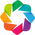

In [2]:
gv.extension('bokeh')
hv.extension('bokeh')

In [3]:
# !pip install kaggle

#### Kaggle Data Download

- The below cell can be used to download the data directly from kaggle using shell commands indicated by `!`.
- On the subsequent runs, it is advisable to comment the below cell to avoid duplication of data download

In [4]:
# !kaggle datasets download -d claygendron/us-household-income-by-zip-code-2021-2011

# !kaggle datasets download -d kartik2112/fraud-detection

# !unzip -q us-household-income-by-zip-code-2021-2011.zip

# !unzip -q fraud-detection.zip

In [5]:
fraud_train_df = pd.read_csv("./fraudTrain.csv")
fraud_test_df = pd.read_csv("./fraudTest.csv")
fraud_train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
fraud_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
fraud_train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Null Values in data

In [8]:
print(f"Null Values : \n{fraud_train_df.isnull().sum()}")

Null Values : 
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [9]:
print(f"Null Values : \n{fraud_test_df.isnull().sum()}")

Null Values : 
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


- There are currently no null values in the training and testing dataset
- Dropping the unnamed 0 column as it is a duplicate of the index column

### Formatting Date to `yy-mm-dd` format

In [10]:
fraud_train_df['trans_date_trans_time']=pd.to_datetime(fraud_train_df['trans_date_trans_time'])
fraud_train_df['trans_date']=fraud_train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_train_df['trans_date']=pd.to_datetime(fraud_train_df['trans_date'])
fraud_train_df['dob']=pd.to_datetime(fraud_train_df['dob'])

fraud_test_df['trans_date_trans_time']=pd.to_datetime(fraud_test_df['trans_date_trans_time'])
fraud_test_df['trans_date']=fraud_test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_test_df['trans_date']=pd.to_datetime(fraud_test_df['trans_date'])
fraud_test_df['dob']=pd.to_datetime(fraud_test_df['dob'])
fraud_test_df.trans_date.head(),fraud_test_df.dob.head(),fraud_train_df.trans_date.head(),fraud_train_df.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [11]:
fraud_train_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_test_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date'],
      dtype='object')

In [12]:

def calculate_age(dob):
    today = datetime.today()
    age = today.year - dob.year
    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1
    return age

In [13]:
fraud_train_df['age'] = fraud_train_df['dob'].apply(calculate_age)
fraud_test_df['age'] = fraud_test_df['dob'].apply(calculate_age)

In [14]:
fraud_train_df.sample(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age
598015,2019-09-10 18:33:03,3533012926413100,fraud_Hermann and Sons,shopping_pos,4.83,Megan,Bernard,F,128 Nathan Ramp,Barneveld,...,1684,IT trainer,1994-03-01,2071a63413c81d8d533797218f2d016f,1347301983,42.572486,-75.768338,0,2019-09-10,30
348532,2019-06-12 22:31:57,4939976756738216,fraud_Rau-Robel,kids_pets,94.65,Michelle,Johnston,F,3531 Hamilton Highway,Roma,...,18128,IT trainer,1990-11-07,3606a1add7474e96660558a7c334d6e6,1339540317,25.837422,-99.645868,0,2019-06-12,34
1043230,2020-03-08 22:47:19,4769426683924058915,fraud_Bartoletti and Sons,personal_care,21.37,Andrea,Cruz,F,26572 Hodge Villages Suite 512,Mifflin,...,1909,Mining engineer,1954-08-22,58637eced02816d5d88ac630666bca3d,1362782839,41.260588,-77.722542,0,2020-03-08,70


### Count of Fradulent transaction in training and test dataset

In [15]:
fraud_train_df["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [16]:
fraud_test_df["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

### Conversion of Date of birth and transaction date time to pandas date format

In [17]:
fraud_train_df["dob"] = pd.to_datetime(fraud_train_df["dob"])
fraud_train_df['trans_date_trans_time'] = pd.to_datetime(fraud_train_df['trans_date_trans_time'])

fraud_test_df["dob"] = pd.to_datetime(fraud_test_df["dob"])
fraud_test_df['trans_date_trans_time'] = pd.to_datetime(fraud_test_df['trans_date_trans_time'])

## Exploratory Data Analysis

### Fraud Distribution

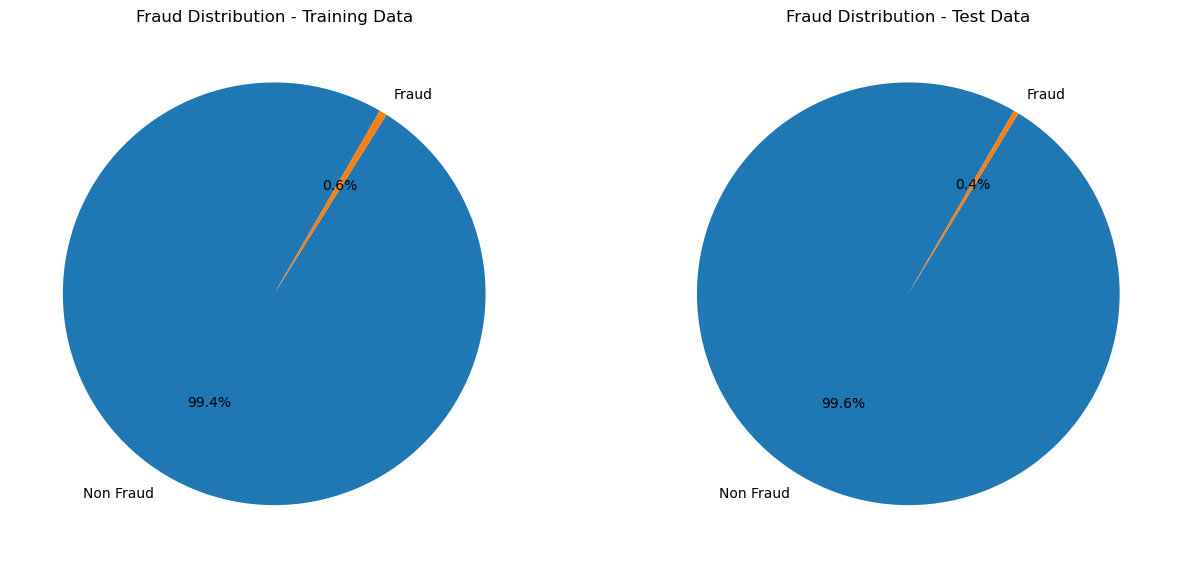

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
labels = ["Non Fraud","Fraud"]
train_values = fraud_train_df.is_fraud.value_counts()
test_values = fraud_test_df.is_fraud.value_counts()

ax1.pie(train_values,labels = labels,autopct = "%1.1f%%",startangle = 60)
ax1.set_title("Fraud Distribution - Training Data")

ax2.pie(test_values,labels = labels,autopct = "%1.1f%%",startangle = 60)
ax2.set_title("Fraud Distribution - Test Data")

plt.show()

- We are able to see that the amount of fraud data is `less than 1%` in the total dataset.

### Fraud distribution across job titles

In [19]:
fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64

In [20]:
fraud_train_job = fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts().head(10)
fraud_test_job = fraud_test_df[fraud_test_df["is_fraud"] == 1]["job"].value_counts().head(10)

fraud_train_job_df = fraud_train_job.reset_index()
fraud_train_job_df.columns = ['job', 'counts']

fraud_test_job_df = fraud_test_job.reset_index()
fraud_test_job_df.columns = ['job', 'counts']

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_2132/2029555219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_train_job_df, x="counts", y="job",palette="viridis")


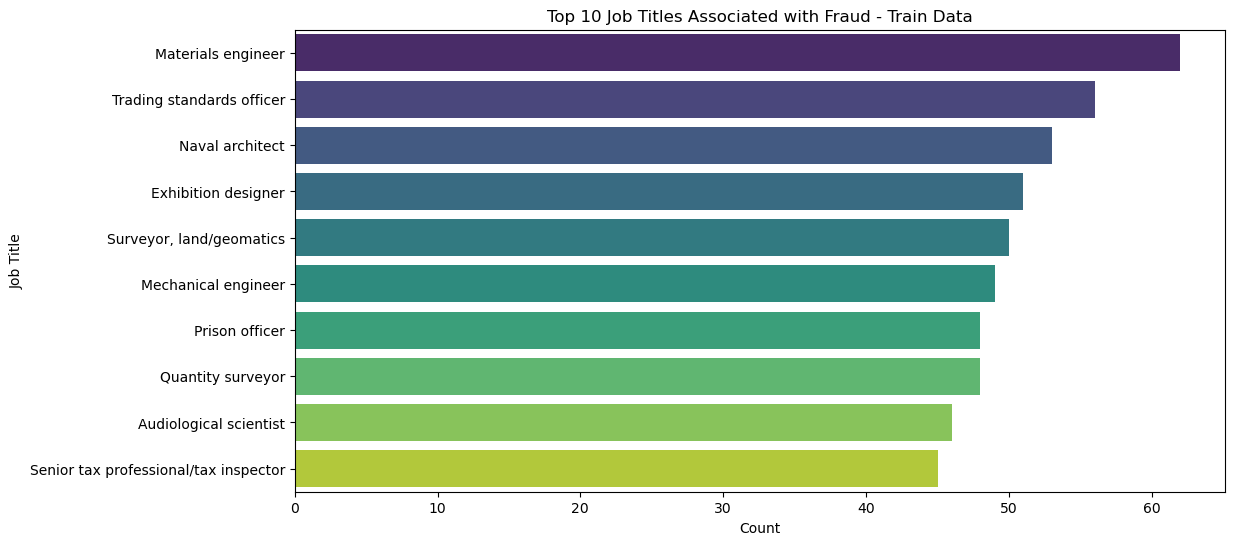

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_train_job_df, x="counts", y="job",palette="viridis")
plt.title('Top 10 Job Titles Associated with Fraud - Train Data')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

- In train dataset, uut of the **443 different job titles under fraud transactions**, the top ten job titles are plotted along with count of fraudulent transactions.
- `Materials engineer` is the job title associated with the highest number of fradulent transactions.

In [22]:
fraud_test_df[fraud_test_df["is_fraud"] == 1]["job"].value_counts()

job
Science writer                 30
Licensed conveyancer           29
Systems developer              29
Engineer, biomedical           28
Colour technologist            27
                               ..
Video editor                    4
Public relations officer        3
Clinical research associate     3
Commercial horticulturist       3
Pilot, airline                  2
Name: count, Length: 177, dtype: int64

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_2132/202057019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_test_job_df, x="counts", y="job",palette="rocket")


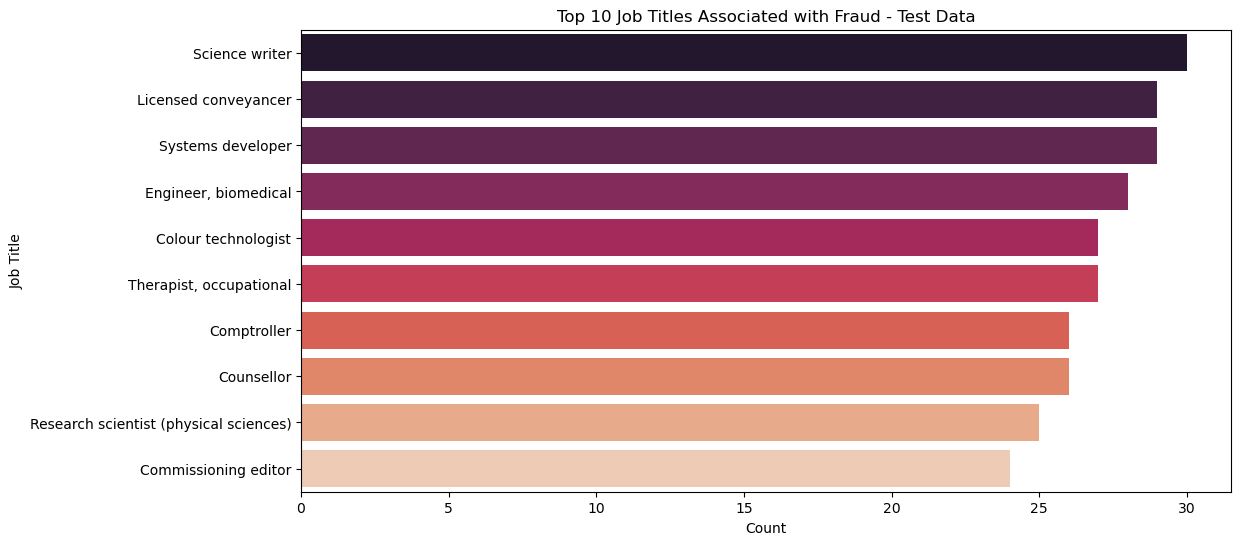

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_test_job_df, x="counts", y="job",palette="rocket")
plt.title('Top 10 Job Titles Associated with Fraud - Test Data')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

- In testing dataset, out of the **177 different job titles under fraud transactions**, the top ten job titles are plotted along with count of fraudulent transactions.
- `Science Writer` is the job title associated with the highest number of fradulent transactions.

### Category vs Fraud

In [24]:
fraud_train_df["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

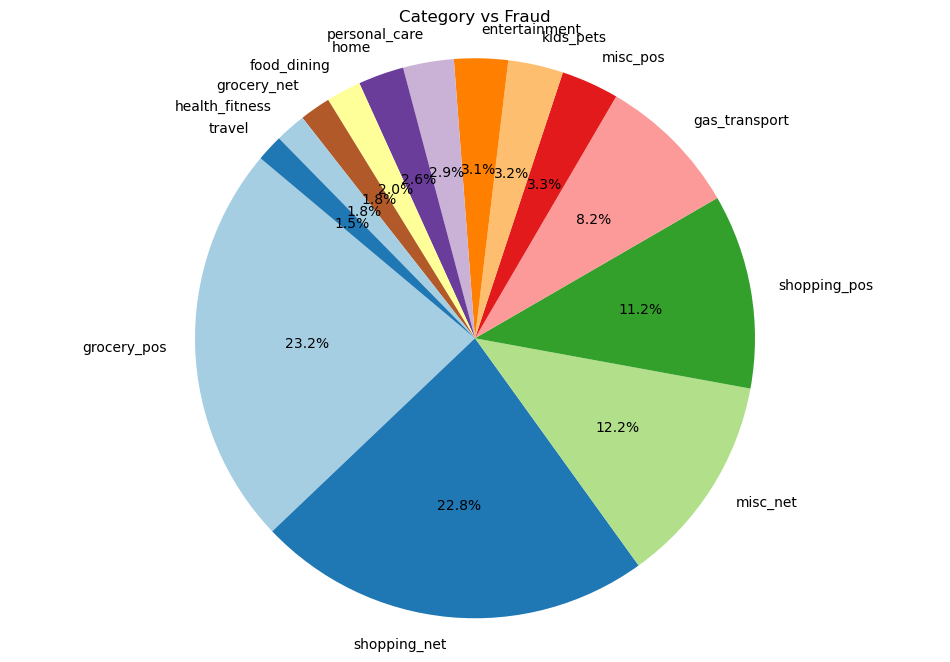

In [25]:
plt.figure(figsize=(12, 8))

fraud_category = fraud_train_df[fraud_train_df["is_fraud"] == 1]["category"].value_counts()

plt.pie(fraud_category, labels=fraud_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired", n_colors=len(fraud_category)))
plt.title("Category vs Fraud")
plt.axis('equal')
plt.show()

- Majority of Fradulent transactions fall under the `grocery_pos` and `shopping_net` category covering nearly `46 % of all fradulent transactions`.
- `Travel` is the category least picked under fraud transaction.

### Average of transaction amount

In [26]:
fraud_train_df.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

 - `Fraud` Transactions have a average of `531 USD`, whereas `non fraud` transactions have an average `of 68 USD` 

### Gender vs Fraud

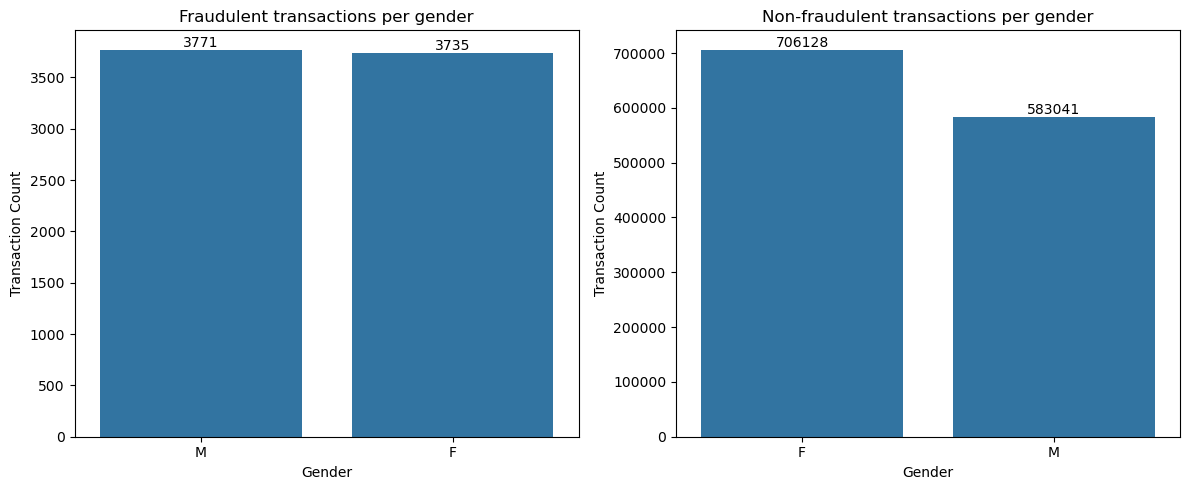

In [27]:
fraud = fraud_train_df[fraud_train_df.is_fraud == 1]
not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0]


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

g_fraud = fraud.gender.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.gender.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=ax1)
ax1.set_title("Fraudulent transactions per gender")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Transaction Count")
ax1.bar_label(ax1.containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=ax2)
ax2.set_title("Non-fraudulent transactions per gender")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Transaction Count")
ax2.bar_label(ax2.containers[0])

plt.tight_layout()

- Out of **7506 fraud** transactions, `50.2% are Male and 49.8% are female`.
- Out of **1289169 non fraud** transactions,  `54.8% are Male, 45.2% are female`.
- We notice that there is no significant differences between the number of fraud victims with respect to gender. Women are involved in more transactions than men - 709863 transactions for the former compared to 586812 for the latter. Hence, around 0.64% of transactions involving men are fraudulent compared to 0.53% for women.

### Age Group vs Fraud

### Fraud distribution vs Age Group

In [28]:
bins = [10, 18, 35, 60, 100]
labels = ["<18", "18-35", "35-60", "60+"]
fraud_train_df["age_group"] = pd.cut(fraud_train_df['age'], bins=bins, labels=labels, right=True)
fraud_test_df["age_group"] = pd.cut(fraud_test_df['age'], bins=bins, labels=labels, right=True)
fraud_train_df.sample(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,age_group
350470,2019-06-13 19:18:14,4926376199189801,fraud_Fisher Inc,shopping_net,1.06,Claire,Davis,F,83685 Matthew Center Suite 870,Cherokee Village,...,Pharmacologist,1977-06-07,e53fc5ed4da3bdde8a36561a89989690,1339615094,36.824481,-92.026598,0,2019-06-13,47,35-60
1069914,2020-03-20 12:39:20,30118423745458,fraud_Schmidt and Sons,shopping_net,1.14,Jared,Velazquez,M,01479 Murray Circle,Matawan,...,Drilling engineer,1993-04-29,7a6ded52f90e736a2285d53e85745c30,1363783160,41.091471,-73.734532,0,2020-03-20,31,18-35


In [29]:
fraud_train_age_group = fraud_train_df.groupby(by=["age_group"],observed=True)["is_fraud"].value_counts().reset_index()
fraud_train_age_group.columns = ["Age group", "Fraud/NonFraud", "Counts"]
fraud_train_age_group["total"] = fraud_train_age_group.groupby("Age group", observed=True)["Counts"].transform('sum')
fraud_train_age_group["percentage"] = round(fraud_train_age_group["Counts"] * 100 / fraud_train_age_group["total"],2)
fraud_train_age_group

,Age group,Fraud/NonFraud,Counts,total,percentage
0,18-35,0,260979,262529,99.41
1,18-35,1,1550,262529,0.59
2,35-60,0,689205,692559,99.52
3,35-60,1,3354,692559,0.48
4,60+,0,338985,341587,99.24
5,60+,1,2602,341587,0.76


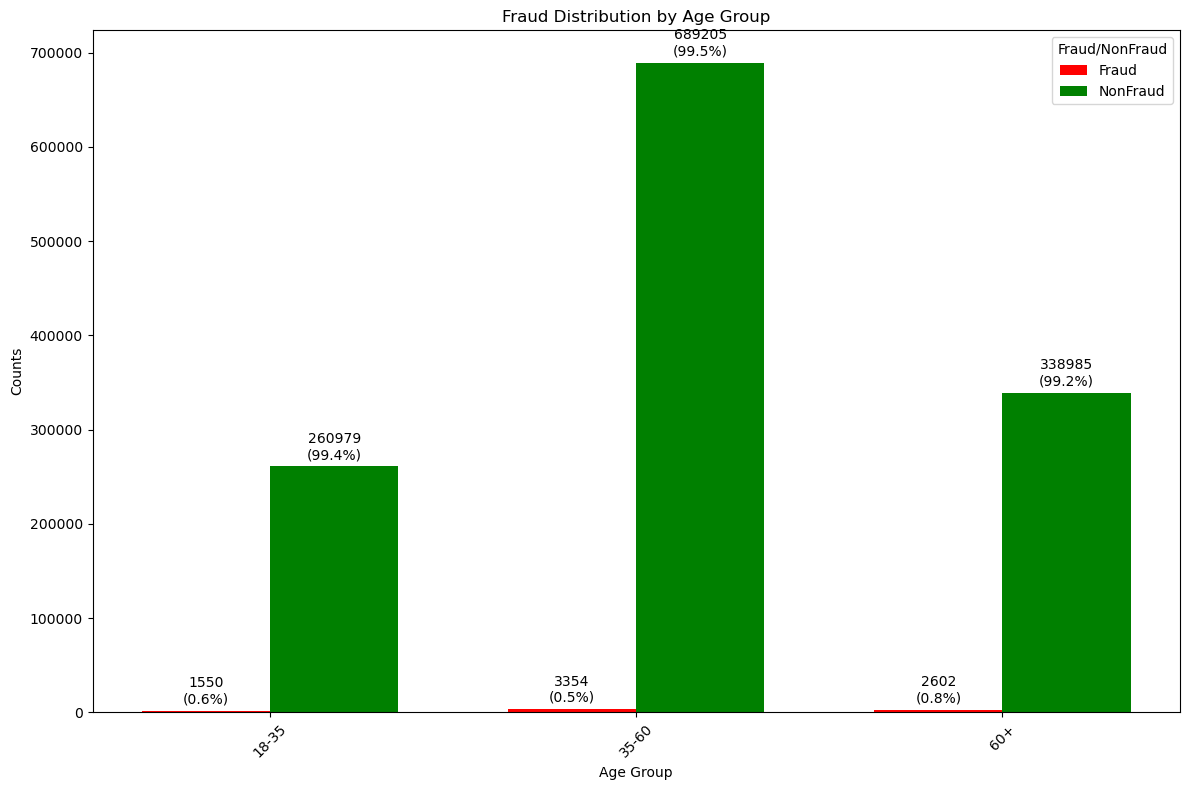

In [30]:

fraud_train_age_group = fraud_train_df.groupby(by=["age_group"], observed=True)["is_fraud"].value_counts().reset_index()
fraud_train_age_group.columns = ["Age group", "Fraud/NonFraud", "Counts"]

fraud_train_age_group['Fraud/NonFraud'] = fraud_train_age_group['Fraud/NonFraud'].replace({0: 'NonFraud', 1: 'Fraud'})

pivot_data = fraud_train_age_group.pivot(index='Age group', columns='Fraud/NonFraud', values='Counts').fillna(0)

total_counts = pivot_data.sum(axis=1)

plt.figure(figsize=(12, 8))  

bar_width = 0.35  
x = np.arange(len(pivot_data.index))

bars_fraud = plt.bar(x - bar_width/2, pivot_data['Fraud'], bar_width, label='Fraud', color='red')
bars_non_fraud = plt.bar(x + bar_width/2, pivot_data['NonFraud'], bar_width, label='NonFraud', color='green')

plt.title('Fraud Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.xticks(x, pivot_data.index, rotation=45) 
plt.legend(title='Fraud/NonFraud')

for bar, total in zip(bars_fraud, total_counts):
    count = bar.get_height()
    percentage = (count / total) * 100
    plt.annotate(f'{count}\n({percentage:.1f}%)', 
                 xy=(bar.get_x() + bar.get_width() / 2, count), 
                 xytext=(0, 3), 
                 textcoords='offset points', 
                 ha='center', va='bottom')

for bar, total in zip(bars_non_fraud, total_counts):
    count = bar.get_height()
    percentage = (count / total) * 100
    plt.annotate(f'{count}\n({percentage:.1f}%)', 
                 xy=(bar.get_x() + bar.get_width() / 2, count), 
                 xytext=(0, 3), 
                 textcoords='offset points', 
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


- We notice that teenagers are less likely to fall to credit card scams due to less access to credit cards.
- People in middle age groups (`35-60`) are more likely to fall to scams which might be due to more credit card usage.
- However higher percentage of credit scams is observed under `60+` age group, due to less exposure to credit card.
- For a side-by-side comparison, we are able to see that there are no transactions related to `fraud` or `non-fraud` done by people `less than 18 years of age`.
- This may be due to fact that the `access to credit card is less likely` foir people `below 18 years of age`.

In [31]:
len(fraud_train_df['zip'].unique())

970

In [32]:
fraud_train_df['zip'].dtype

dtype('int64')

### Data on USA median income from 2011 till 2021

In [33]:
us_median_income = pd.read_csv("./us_income_zipcode.csv")

In [34]:
us_median_income.head()

,ZIP,Geography,Geographic Area Name,Households,Households Margin of Error,"Households Less Than $10,000","Households Less Than $10,000 Margin of Error","Households $10,000 to $14,999","Households $10,000 to $14,999 Margin of Error","Households $15,000 to $24,999",...,"Nonfamily Households $150,000 to $199,999","Nonfamily Households $150,000 to $199,999 Margin of Error","Nonfamily Households $200,000 or More","Nonfamily Households $200,000 or More Margin of Error",Nonfamily Households Median Income (Dollars),Nonfamily Households Median Income (Dollars) Margin of Error,Nonfamily Households Mean Income (Dollars),Nonfamily Households Mean Income (Dollars) Margin of Error,Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,860Z200US00601,ZCTA5 00601,5397.0,264.0,33.2,4.4,15.7,2.9,23.9,...,0.0,2.8,0.0,2.8,9386.0,1472.0,13044.0,1949.0,15.0,2021.0
1,602,860Z200US00602,ZCTA5 00602,12858.0,448.0,27.1,2.9,12.7,2.1,20.5,...,0.0,1.3,0.0,1.3,11242.0,1993.0,16419.0,2310.0,20.1,2021.0
2,603,860Z200US00603,ZCTA5 00603,19295.0,555.0,32.1,2.5,13.4,1.6,17.2,...,0.6,0.6,0.2,0.4,10639.0,844.0,16824.0,2217.0,34.9,2021.0
3,606,860Z200US00606,ZCTA5 00606,1968.0,171.0,28.4,5.5,13.3,4.4,23.3,...,0.0,7.5,0.0,7.5,15849.0,3067.0,16312.0,2662.0,13.0,2021.0
4,610,860Z200US00610,ZCTA5 00610,8934.0,372.0,20.5,2.5,13.2,2.5,23.3,...,0.0,1.8,0.0,1.8,12832.0,2405.0,16756.0,1740.0,14.5,2021.0


In [35]:
len(us_median_income['ZIP'].unique())

33995

In [36]:
us_median_income['Year'] = us_median_income['Year'].astype(int)

In [37]:
us_median_income_2021_2011 = us_median_income[['ZIP','Year','Households Median Income (Dollars)']]
us_median_income_2021_2011.head()

,ZIP,Year,Households Median Income (Dollars)
0,601,2021,15292.0
1,602,2021,18716.0
2,603,2021,16789.0
3,606,2021,18835.0
4,610,2021,21239.0


In [38]:
us_median_income_2020_2019 = us_median_income_2021_2011[us_median_income_2021_2011['Year'].isin([2019,2020])]
us_median_income_2020_2019['Year'].unique()

array([2020, 2019])

#### Adding Transaction Year to the train and test data

In [39]:
fraud_train_df["trans_year"] = pd.Series(pd.to_datetime(fraud_train_df.trans_date_trans_time)).dt.year
fraud_test_df["trans_year"] = pd.Series(pd.to_datetime(fraud_test_df.trans_date_trans_time)).dt.year

In [40]:
fraud_train_df = pd.merge(fraud_train_df, us_median_income_2020_2019, how="left", left_on=["trans_year", "zip"], right_on=["Year", "ZIP"])
fraud_train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,trans_date,age,age_group,trans_year,ZIP,Year,Households Median Income (Dollars)
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019-01-01,36,35-60,2019,28654,2019,45809.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019-01-01,46,35-60,2019,99160,2019,22500.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,2019-01-01,62,60+,2019,83252,2019,53636.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,2019-01-01,57,35-60,2019,59632,2019,44063.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,2019-01-01,38,35-60,2019,24433,2019,47813.0


In [41]:
fraud_train_df = fraud_train_df.drop(columns=[col for col in fraud_train_df.columns if col.endswith(('_x', '_y'))])
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)'],
      dtype='object')

In [42]:
fraud_test_df = pd.merge(fraud_test_df, us_median_income_2020_2019, how="left", left_on=["trans_year", "zip"], right_on=["Year", "ZIP"])
fraud_test_df = fraud_test_df.drop(columns=[col for col in fraud_test_df.columns if col.endswith(('_x', '_y'))])
fraud_test_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)'],
      dtype='object')

#### Imputing the null values in `Household Median Income (Dollars)` column

In [43]:
print(fraud_train_df.isna().sum())

trans_date_trans_time                     0
cc_num                                    0
merchant                                  0
category                                  0
amt                                       0
first                                     0
last                                      0
gender                                    0
street                                    0
city                                      0
state                                     0
zip                                       0
lat                                       0
long                                      0
city_pop                                  0
job                                       0
dob                                       0
trans_num                                 0
unix_time                                 0
merch_lat                                 0
merch_long                                0
is_fraud                                  0
trans_date                      

In [44]:
len(fraud_train_df)

1296675

In [45]:
87621/len(fraud_train_df)

0.06757360171207126

- There are `6.75%` of data in `Households Median Income (Dollars) ` which are null, which is less than `30%`. 
- Hence the current median income dataset can be used and imputed to fill nan values.

- Here for NaN values based on ZIP , we try imputing NaN using the city as a parameter.
- However we are able to see that there are still NaN values when finding median income based on street (40) and city (33).

In [46]:
city_median_income = fraud_train_df.groupby('city')['Households Median Income (Dollars)'].median()
len(city_median_income[city_median_income.isna()])

33

In [47]:
street_median_income = fraud_train_df.groupby('street')['Households Median Income (Dollars)'].median()
len(street_median_income[street_median_income.isna()])

40

- However when using grouping by state and finding the median income, we are able to see that there are no null values. 
- Hence the null values are imputed using the state grouping followed by year to replace the NaN values.

In [48]:
state_median_income = fraud_train_df.groupby(['state','Year'])['Households Median Income (Dollars)'].median()

In [49]:
state_median_income[state_median_income.isna()]

Series([], Name: Households Median Income (Dollars), dtype: float64)

In [50]:
state_median_income_dict = state_median_income.to_dict()
state_median_income_dict = {
    f"{state}_{year}": income
    for (state, year), income in state_median_income_dict.items()
}
state_median_income_dict['AK_2019'], state_median_income_dict['AK_2020']

(31250.0, 28571.0)

In [51]:
fraud_train_df[['ZIP','Households Median Income (Dollars)']].isna().sum()

ZIP                                       0
Households Median Income (Dollars)    87621
dtype: int64

In [52]:
fraud_train_df.isna().sum()

trans_date_trans_time                     0
cc_num                                    0
merchant                                  0
category                                  0
amt                                       0
first                                     0
last                                      0
gender                                    0
street                                    0
city                                      0
state                                     0
zip                                       0
lat                                       0
long                                      0
city_pop                                  0
job                                       0
dob                                       0
trans_num                                 0
unix_time                                 0
merch_lat                                 0
merch_long                                0
is_fraud                                  0
trans_date                      

In [53]:
pre_impute_train_df = fraud_train_df.copy()

#### Creating a column with state and year as a string to be used for imputing the data

In [54]:
pre_impute_train_df['state_year'] = pre_impute_train_df['state'].astype(str) + '_' + pre_impute_train_df['Year'].astype(str)

In [55]:
pre_impute_train_df["Households Median Income (Dollars)"] = pre_impute_train_df["Households Median Income (Dollars)"].fillna(
    pre_impute_train_df['state_year'].map(state_median_income_dict)
)

In [56]:
pre_impute_train_df.drop(columns=['state_year'], inplace=True)

In [57]:
print(pre_impute_train_df.isna().sum())

trans_date_trans_time                 0
cc_num                                0
merchant                              0
category                              0
amt                                   0
first                                 0
last                                  0
gender                                0
street                                0
city                                  0
state                                 0
zip                                   0
lat                                   0
long                                  0
city_pop                              0
job                                   0
dob                                   0
trans_num                             0
unix_time                             0
merch_lat                             0
merch_long                            0
is_fraud                              0
trans_date                            0
age                                   0
age_group                             0


### Imputation

#### Mean Median KNN Imputation

In [58]:
fraud_train_df_mean_test = fraud_train_df.filter(["NJ","OK","TX","CA","NY","state","Year","Households Median Income (Dollars)"], axis=1).copy()
mean_imputer = SimpleImputer(strategy='mean')
fraud_train_df_mean_test['Households Median Income (Dollars)'] = mean_imputer.fit_transform(fraud_train_df_mean_test['Households Median Income (Dollars)'].values.reshape(-1,1))

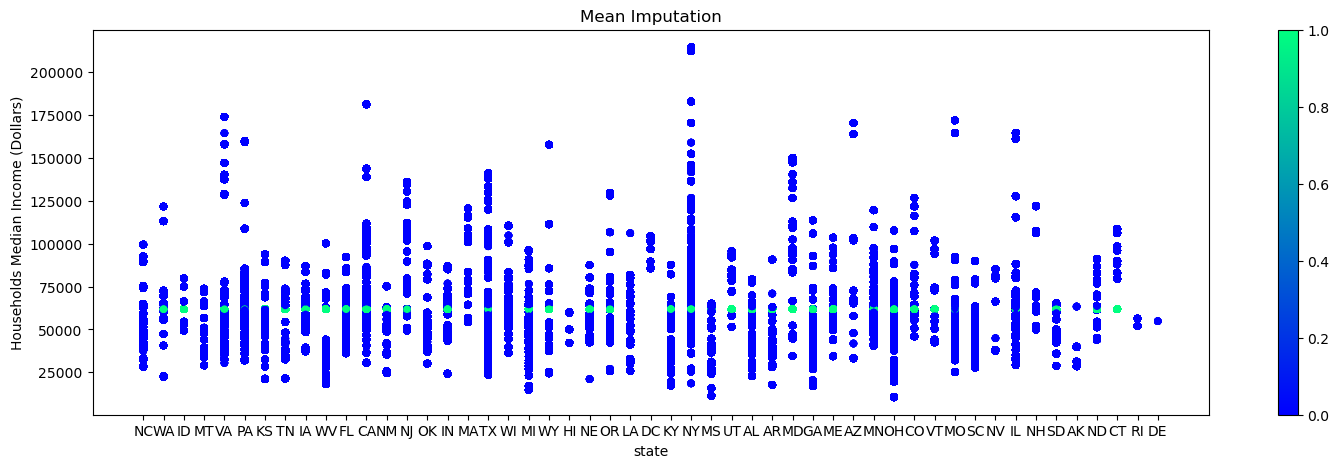

In [59]:
ax = fraud_train_df_mean_test.plot(
    x='state', 
    y='Households Median Income (Dollars)', 
    kind='scatter', 
    c=fraud_train_df['Households Median Income (Dollars)'].isnull(), 
    cmap='winter', 
    title='Mean Imputation', 
    colorbar=True,
    figsize=(18, 5) 
)

plt.show()

#### Median

In [60]:
fraud_train_df_median_test = fraud_train_df.filter(["NJ","OK","TX","CA","NY","state","Year","Households Median Income (Dollars)"], axis=1).copy()
mean_imputer = SimpleImputer(strategy='median')
fraud_train_df_median_test['Households Median Income (Dollars)'] = mean_imputer.fit_transform(fraud_train_df_median_test['Households Median Income (Dollars)'].values.reshape(-1,1))

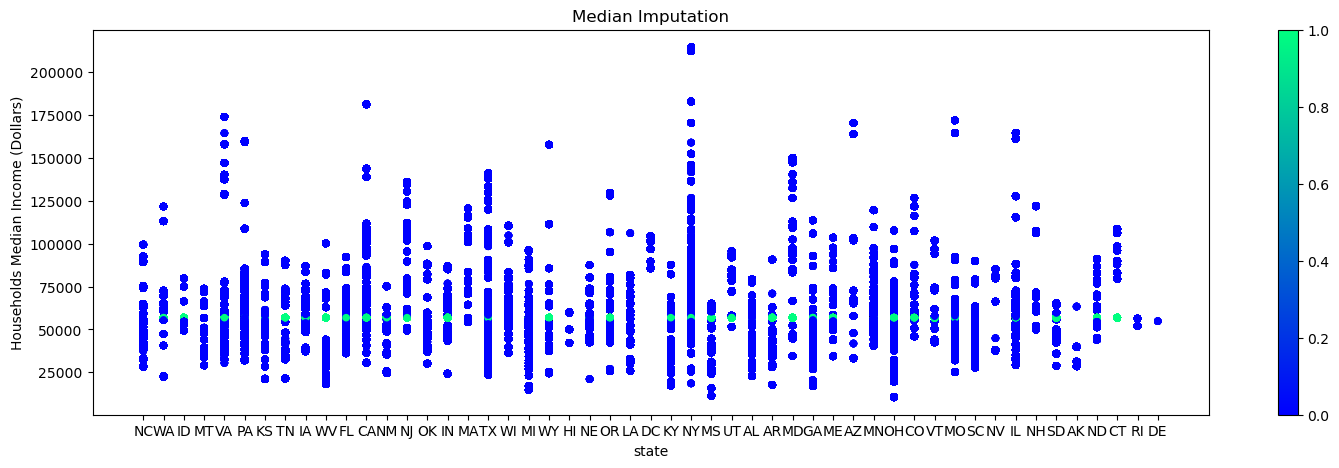

In [61]:
ax = fraud_train_df_median_test.plot(
    x='state', 
    y='Households Median Income (Dollars)', 
    kind='scatter', 
    c=fraud_train_df['Households Median Income (Dollars)'].isnull(), 
    cmap='winter', 
    title='Median Imputation', 
    colorbar=True,
    figsize=(18, 5) 
)

plt.show()

#### Drawbacks of Mean, Median, KNN Imputation

- Usage of KNNImputer is time consuming for large data
- For imputing the data under household median income, the time taken was around 1 hour and hence not feasible
- The usage of mean median imputations were not a good basis as the mean for the entire dataset is calculated and imputed which is not the expected result.

In [62]:
# !pip install fancyimpute

#### MICE Imputation with dummy state variables

In [63]:
len(fraud_train_df[fraud_train_df["Households Median Income (Dollars)"].isna()]['state'])

87621

In [64]:
null_val_present_states = np.unique(fraud_train_df[fraud_train_df["Households Median Income (Dollars)"].isna()]['state'])
states_without_null_in_income = [state for state in np.unique(fraud_train_df.state) if state not in null_val_present_states]

In [65]:
state_dummies = pd.get_dummies(fraud_train_df['state'], prefix='', prefix_sep='')
state_dummies = state_dummies[null_val_present_states]

In [66]:
fraud_train_df_cpy_1 = fraud_train_df.copy()

In [67]:
fraud_train_df_cpy_1[null_val_present_states] = state_dummies
fraud_train_df_cpy_1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)', 'AL',
       'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'ND', 'NE', 'NJ', 'NM', 'NY', 'OH',
       'OR', 'PA', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WV', 'WY'],
      dtype='object')

In [68]:
fraud_train_df_mice_test_cpy_1 = fraud_train_df_cpy_1.filter(list(null_val_present_states) + ["ZIP","Year","Households Median Income (Dollars)"], axis=1).copy()
fraud_train_df_mice_test_cpy_1.columns

Index(['AL', 'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'ND', 'NE', 'NJ', 'NM', 'NY',
       'OH', 'OR', 'PA', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WV', 'WY',
       'ZIP', 'Year', 'Households Median Income (Dollars)'],
      dtype='object')

In [69]:
%%time
mice_imputer_cpy_1 = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

fraud_train_df_mice_test_imputed_cpy_1 = pd.DataFrame(mice_imputer_cpy_1.fit_transform(fraud_train_df_mice_test_cpy_1), columns=fraud_train_df_mice_test_cpy_1.columns)
# CPU times: user 14min 39s, sys: 8min 20s, total: 23min
# Wall time: 3min 27s

CPU times: user 14min 35s, sys: 8min 24s, total: 22min 59s
Wall time: 3min 27s


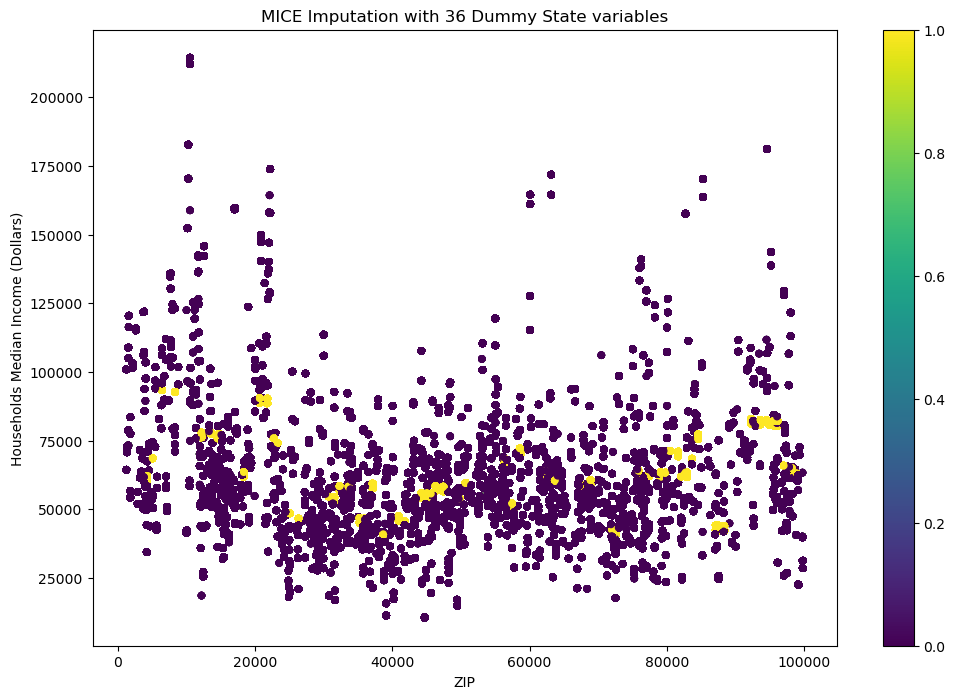

In [70]:

ax = fraud_train_df_mice_test_imputed_cpy_1.plot(
    x='ZIP', 
    y='Households Median Income (Dollars)', 
    kind='scatter', 
    c=fraud_train_df['Households Median Income (Dollars)'].isnull(), 
    cmap='viridis', 
    title='MICE Imputation with 36 Dummy State variables', 
    colorbar=True,
    figsize=(12, 8)
)

plt.show()

In [71]:
len(null_val_present_states)

36

In [72]:
len(states_without_null_in_income)

15

- Usage of MICE Imputation is better when compared to Mean, Median, Mode, KNN Imputation.
- However the Imputation is not appropriate when comparing the overall values imputed as the values seems to be across a straight lines.
- The MICE Imputation would be further improved by using dummy values for each states
- Here from the household income dataset, we have `36` states which have null values under `household median income data`, whereas `15` states have no null values.
- Comparing with the MICE Imputation wihtout dummy values, the imputation with dummy values provides a better result.

#### Comparing the Imputation using join vs MICE Imputation

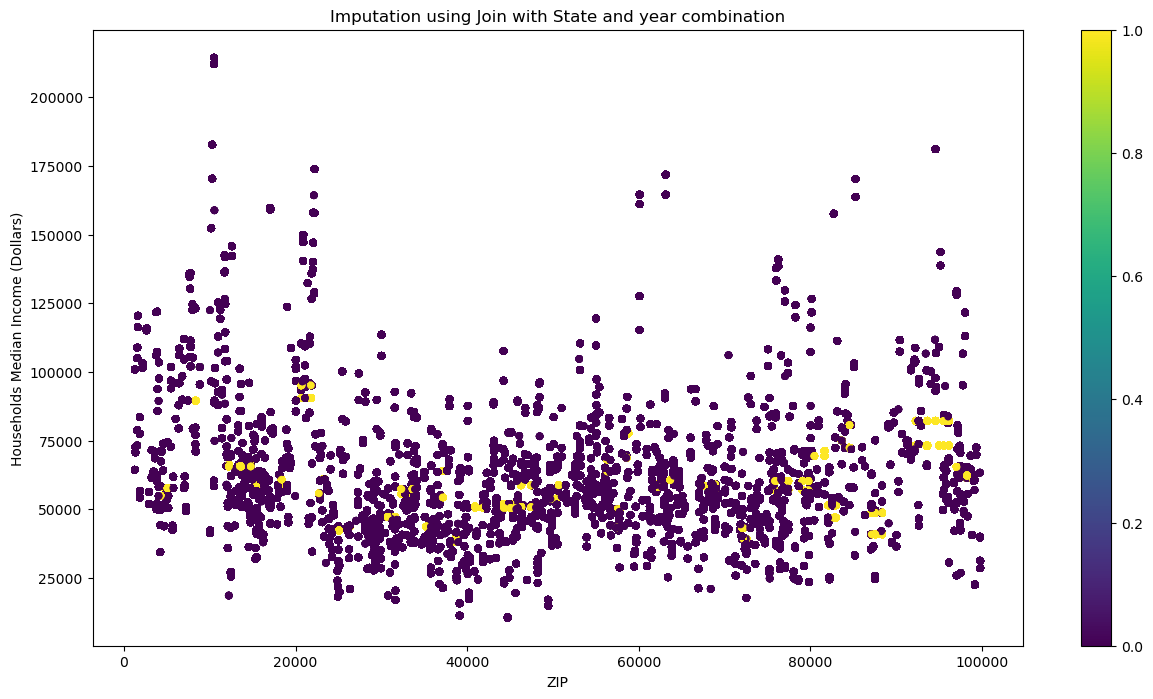

CPU times: user 14.4 s, sys: 1.07 s, total: 15.5 s
Wall time: 14.4 s


In [73]:
%%time
ax = pre_impute_train_df.plot(
    x='ZIP', 
    y='Households Median Income (Dollars)', 
    kind='scatter', 
    c=fraud_train_df['Households Median Income (Dollars)'].isnull(), 
    cmap='viridis',
    title='Imputation using Join with State and year combination',
    colorbar=True,
    figsize=(15, 8)
)

plt.show()

In [74]:
fraud_train_df['Households Median Income (Dollars)'] = fraud_train_df['Households Median Income (Dollars)'].fillna(
    fraud_train_df_mice_test_imputed_cpy_1['Households Median Income (Dollars)']
)

In [75]:
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)'],
      dtype='object')

In [76]:
len(fraud_test_df[fraud_test_df["Households Median Income (Dollars)"].isna()]['state'])

38221

In [77]:
null_val_present_states = np.unique(fraud_test_df[fraud_test_df["Households Median Income (Dollars)"].isna()]['state'])

In [78]:
states_without_null_in_income = [state for state in np.unique(fraud_test_df.state) if state not in null_val_present_states]

In [79]:
state_dummies = pd.get_dummies(fraud_test_df['state'], prefix='', prefix_sep='')
state_dummies = state_dummies[null_val_present_states]

In [80]:
fraud_test_df_cpy_1 = fraud_test_df.copy()
fraud_test_df_cpy_1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)'],
      dtype='object')

In [81]:
fraud_test_df_cpy_1[null_val_present_states] = state_dummies
fraud_test_df_cpy_1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)', 'AL',
       'AR', 'CA', 'CO', 'FL', 'GA', 'IA', 'IL', 'IN', 'KY', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'ND', 'NE', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WV', 'WY'],
      dtype='object')

In [82]:
fraud_test_df_mice_test_cpy_1 = fraud_test_df_cpy_1.filter(list(null_val_present_states) + ["ZIP","Year","Households Median Income (Dollars)"], axis=1).copy()
fraud_test_df_mice_test_cpy_1.columns

Index(['AL', 'AR', 'CA', 'CO', 'FL', 'GA', 'IA', 'IL', 'IN', 'KY', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'ND', 'NE', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WV', 'WY', 'ZIP', 'Year',
       'Households Median Income (Dollars)'],
      dtype='object')

In [83]:
%%time
mice_imputer_cpy_1 = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

fraud_test_df_mice_test_imputed_cpy_1 = pd.DataFrame(mice_imputer_cpy_1.fit_transform(fraud_test_df_mice_test_cpy_1), columns=fraud_test_df_mice_test_cpy_1.columns)
# CPU times: user 14min 39s, sys: 8min 20s, total: 23min
# Wall time: 3min 27s

CPU times: user 6min 3s, sys: 2min 8s, total: 8min 11s
Wall time: 58.6 s


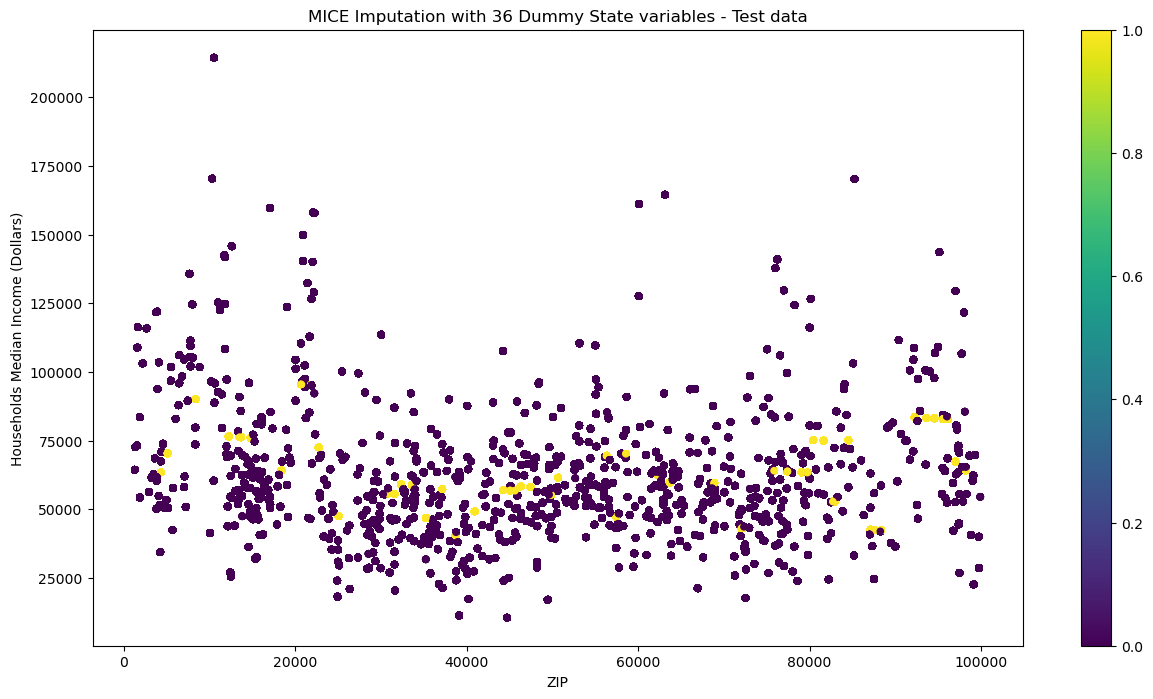

In [84]:

ax = fraud_test_df_mice_test_imputed_cpy_1.plot(
    x='ZIP', 
    y='Households Median Income (Dollars)', 
    kind='scatter', 
    c=fraud_test_df['Households Median Income (Dollars)'].isnull(), 
    cmap='viridis', 
    title='MICE Imputation with 36 Dummy State variables - Test data', 
    colorbar=True,
    figsize=(15, 8)
)

plt.show()

In [85]:
fraud_test_df['Households Median Income (Dollars)'] = fraud_test_df['Households Median Income (Dollars)'].fillna(
    fraud_test_df_mice_test_imputed_cpy_1['Households Median Income (Dollars)']
)

In [86]:
fraud_test_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)'],
      dtype='object')

### Household Median Income based on ZipCode  vs Fraud transactions

In [87]:
amount_bins = [0, 10000, 50000, 100000, 214420]
amount_labels = ["<10k", "10k-50k", "50k-100k", "100k+"]

fraud_train_df["Median_Income_group"] = pd.cut(fraud_train_df['Households Median Income (Dollars)'], bins=amount_bins, labels=amount_labels, right=False)
fraud_test_df["Median_Income_group"] = pd.cut(fraud_test_df['Households Median Income (Dollars)'], bins=amount_bins, labels=amount_labels, right=False)

In [88]:
income_fraud = fraud_train_df[fraud_train_df.is_fraud == 1].Median_Income_group.value_counts().reset_index()
income_fraud.columns = ["Median Income group", "Counts"]
income_not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0].Median_Income_group.value_counts().reset_index()
income_not_fraud.columns = ["Median Income group", "Counts"]

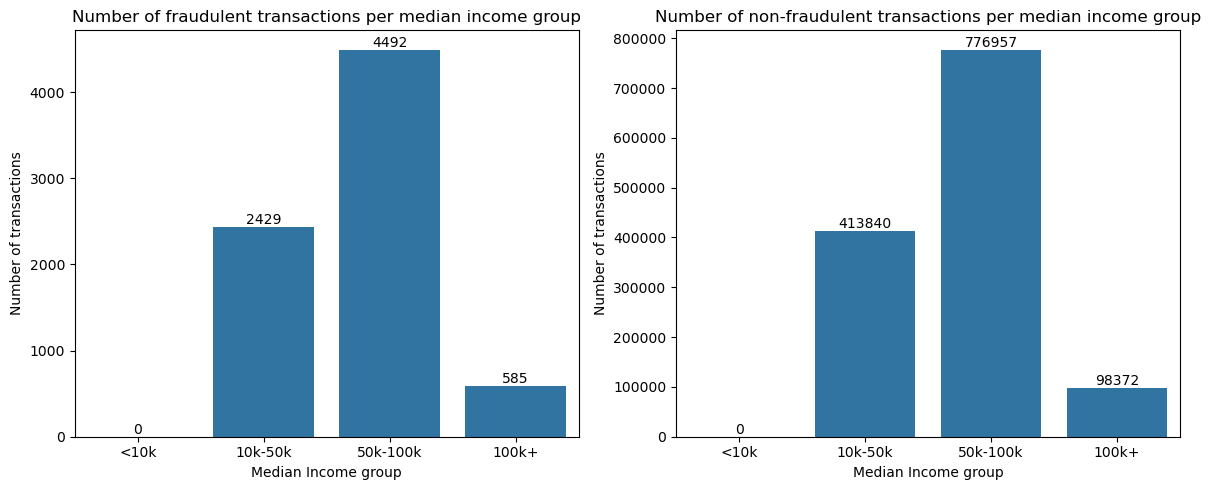

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x="Median Income group", y="Counts", data=income_fraud, ax=ax1)
ax1.set_title("Number of fraudulent transactions per median income group")
ax1.set_xlabel("Median Income group")
ax1.set_ylabel("Number of transactions")
ax1.bar_label(ax1.containers[0])

sns.barplot(x="Median Income group", y="Counts", data=income_not_fraud, ax=ax2)
ax2.set_title("Number of non-fraudulent transactions per median income group")
ax2.set_xlabel("Median Income group")
ax2.set_ylabel("Number of transactions")
ax2.bar_label(ax2.containers[0])

plt.tight_layout()

- Based on above bar graph, we are able to see that the `majority` of the fraud transaction is targeted around the `50,000 to 100,000 USD Median Household Income groups`.
-  We are also able to see that the number of credit card transactions is most used in the `50,000 to 100,000 USD Median Household Income group` as well.
-  Comparing the percentage of fraud transaction,`100k+ group` has the higher percentage when compared to rest of teh groups.

In [90]:
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)',
       'Median_Income_group'],
      dtype='object')

### Region, Income Group vs Number of Transactions

In [91]:
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
    'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South',
    'WV': 'South', 'NC': 'South', 'SC': 'South',
    'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South',
    'TN': 'South', 'KY': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'MT': 'Rocky Mountains', 'WY': 'Rocky Mountains',
    'CO': 'Rocky Mountains', 'NM': 'Rocky Mountains', 'ID': 'Rocky Mountains',
    'UT': 'Rocky Mountains', 'AZ': 'Rocky Mountains' , 'NV': 'Rocky Mountains', 'WA': 'Far West', 'OR': 'Far West',
    'CA': 'Far West', 'HI': 'Far West', 'AK': 'Far West'
}

fraud_train_df["Region"] = fraud_train_df.state.map(state_to_region)
fraud_test_df["Region"] = fraud_test_df.state.map(state_to_region)

Region based split from `https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#/media/File:Census_Regions_and_Division_of_the_United_States.svg`
Wikipedia

In [92]:
region_income_fraud = fraud_train_df[fraud_train_df.is_fraud == 1][['Region','Median_Income_group']].value_counts().reset_index()
region_income_fraud.columns = ["Region","Median_Income_group","Counts"]
region_income_not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0][['Region','Median_Income_group']].value_counts().reset_index()
region_income_not_fraud.columns = ["Region","Median_Income_group", "Counts"]

In [93]:

output_notebook()

df_pivot = region_income_fraud.pivot_table(index="Region", columns="Median_Income_group", values="Counts")


data = df_pivot.reset_index()
data = pd.melt(data, id_vars='Region', var_name='Median_Income_group', value_name='Counts')


p = figure(title="Heatmap of Fraud Transactions by Region and Income",
           x_range=list(data['Median_Income_group'].unique()),
           y_range=list(data['Region'].unique()),
           x_axis_location="above",
           tools="hover",
           tooltips=[("Region", "@Region"), ("Income Group", "@Median_Income_group"), ("Counts", "@Counts")],
           height=600, width=900)


mapper = linear_cmap(field_name='Counts', palette=Viridis256, low=data['Counts'].min(), high=data['Counts'].max())


p.rect(x='Median_Income_group', y='Region', width=1, height=1,
        source=data,
        line_color=None,
        fill_color=mapper)


color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
p.add_layout(color_bar, 'right')


p.xaxis.axis_label = "Income"
p.yaxis.axis_label = "Region"
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.title.align = "center"


show(p)

Loading BokehJS ...

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_2132/1078084005.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = region_income_fraud.pivot_table(index="Region", columns="Median_Income_group", values="Counts")


- Based on Above heat map, the `Southern Region of USA` with the Household Median income group of `50k - 100k` has the highest amount of `fraudulent` transactions.
- `Rocky Mountains region with 10k-50k` and `Midwest region with 100+ Median income group` have the `least` amount of fradulent transaction.
- The lower amount of transaction in `Midwest under 100+ Median income group`, could be due to the `amount per transaction is very large`.

In [94]:


output_notebook()

df_pivot = region_income_not_fraud.pivot_table(index="Region", columns="Median_Income_group", values="Counts")

data = df_pivot.reset_index()
data = pd.melt(data, id_vars='Region', var_name='Median_Income_group', value_name='Counts')


p = figure(title="Heatmap of Non Fraud Transactions by Region and Income",
           x_range=list(data['Median_Income_group'].unique()),
           y_range=list(data['Region'].unique()),
           x_axis_location="above",
           tools="hover",
           tooltips=[("Region", "@Region"), ("Income Group", "@Median_Income_group"), ("Counts", "@Counts")],
           height=600, width=900)


mapper = linear_cmap(field_name='Counts', palette=Viridis256, low=data['Counts'].min(), high=data['Counts'].max())


p.rect(x='Median_Income_group', y='Region', width=1, height=1,
        source=data,
        line_color=None,
        fill_color=mapper)


color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
p.add_layout(color_bar, 'right')


p.xaxis.axis_label = "Income"
p.yaxis.axis_label = "Region"
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.title.align = "center"


show(p)

Loading BokehJS ...

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_2132/917126868.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = region_income_not_fraud.pivot_table(index="Region", columns="Median_Income_group", values="Counts")


- Based on above heatmap for the testing dataset, the `Midwest` region under `50k-100k Income Group` has the `highest count` of `non fradulent` transactions.
- The `Rocky Mountains` and `Midwest` region under `100k+ Income group` has the `least count` of `non fradulent` transactions.
- The lower amount of transactions under `Rocky Mountains` and `Midwest` regions is due to the `transaction amount being very large`

### Distribution of data across different states

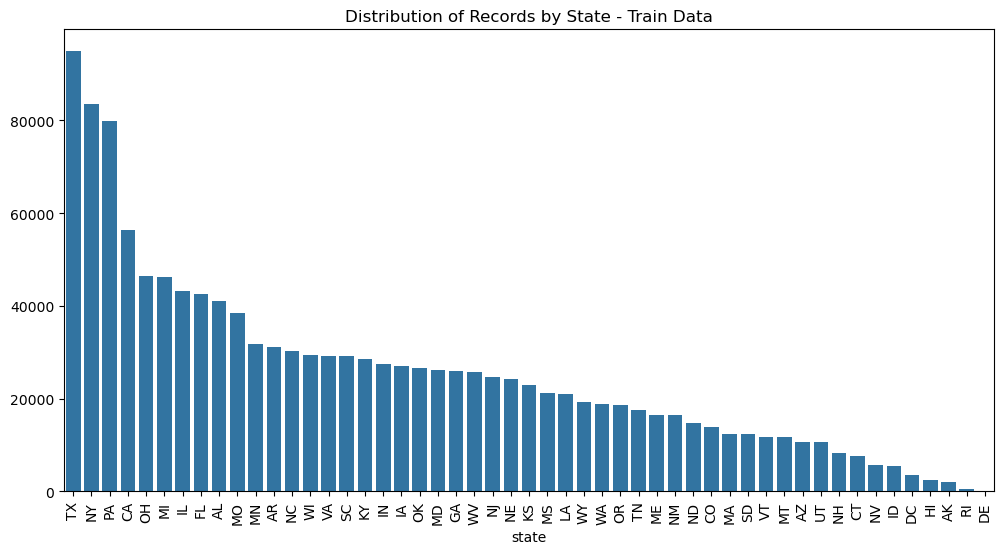

In [95]:
state_counts = fraud_train_df['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Distribution of Records by State - Train Data')
plt.xticks(rotation=90)
plt.show()

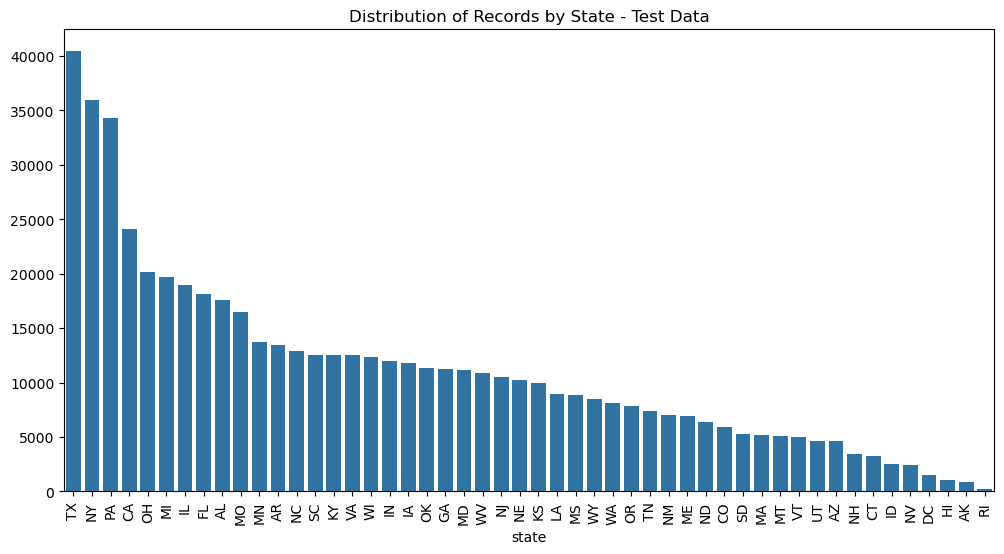

In [96]:
state_counts_1 = fraud_test_df['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts_1.index, y=state_counts_1.values)
plt.title('Distribution of Records by State - Test Data')
plt.xticks(rotation=90)
plt.show()

- Comparing the data with the popultaion of USA, we are able to confirm that the data has more transactions from `population dense areas`.

## GEOPLOT of Fraud Transactions by City

In [97]:
# !pip install geoviews

> GeoCity is the feature name required for Geopandas to plot the values using geoviews map

In [98]:
fraud_train_df['GeoCity'] = fraud_train_df.city

In [99]:

geo_fraud_train_df = gpd.GeoDataFrame(
    fraud_train_df, geometry=gpd.points_from_xy(fraud_train_df.long, fraud_train_df.lat)
)


In [100]:
world = gv.tile_sources.OSM().opts(
    height=1000,
    width=1200
)

In [101]:
87621/len(fraud_train_df)

0.06757360171207126

In [102]:
len(fraud_train_df)

1296675

In [103]:
city_grouped = fraud_train_df.groupby(['city', 'long', 'lat']).agg(
    fraud_count=pd.NamedAgg(column='is_fraud', aggfunc='sum'),
    non_fraud_count=pd.NamedAgg(column='is_fraud', aggfunc=lambda x: (x == 0).sum()), 
    Median_Income_group=pd.NamedAgg(column='Median_Income_group', aggfunc='first'),
    age_group=pd.NamedAgg(column='age_group', aggfunc='first'),
    state=pd.NamedAgg(column='state', aggfunc='first')
).reset_index()

world = gv.tile_sources.OSM().opts(
    height=1000,
    width=1200
)

hover = HoverTool(
    tooltips=[
        ("City", "@city"),
        ("State", "@state"),
        ("Fraud Count", "@fraud_count"),
        ("Non-Fraud Count", "@non_fraud_count"),
        ("Median Income Group", "@Median_Income_group"),
        ("Age Group", "@age_group")
    ]
)

busy_geo = world * gv.Points(
    city_grouped, 
    ['long', 'lat'],
    ['city', 'state', 'fraud_count', 'non_fraud_count', 'Median_Income_group', 'age_group']
).opts(
    tools=[hover],
    colorbar=True,
    size=gv.dim('fraud_count'),  
    color='fraud_count',  
    cmap='viridis',
    height=1000,
    width=1200,
    title='Fraudulent Transactions by City'
)

pn.Row(
    busy_geo, 
).servable()


Row
    [0] HoloViews(Overlay, height=1000, sizing_mode='fixed', width=1200)

- The plot for transactions by city is more concentrated around the `East`.
- This may be due to the fact that `most of the population in USA is in Eastern side`.
- The `scarcity` of transactions towards the Western side could be due to the Rocky mountains.

### Fraud Counts per Capita per city

In [104]:

# city_grouped = fraud_train_df.groupby(['city', 'long', 'lat']).agg(
#     fraud_count=pd.NamedAgg(column='is_fraud', aggfunc='sum'),
#     non_fraud_count=pd.NamedAgg(column='is_fraud', aggfunc=lambda x: (x == 0).sum()), 
#     Median_Income_group=pd.NamedAgg(column='Median_Income_group', aggfunc='first'),
#     age_group=pd.NamedAgg(column='age_group', aggfunc='first'),
#     state=pd.NamedAgg(column='state', aggfunc='first'),
#     city_pop=pd.NamedAgg(column='city_pop', aggfunc='first')
# ).reset_index()

# city_grouped['fraud_per_capita'] = city_grouped['fraud_count'] / city_grouped['city_pop']

# world = gv.tile_sources.OSM().opts(
#     height=1000,
#     width=1200
# )

# hover = HoverTool(
#     tooltips=[
#         ("City", "@city"),
#         ("State", "@state"),
#         ("Fraud Count", "@fraud_count"),
#         ("Non-Fraud Count", "@non_fraud_count"),
#         ("Median Income Group", "@Median_Income_group"),
#         ("Age Group", "@age_group"),
#         ("Fraud per Capita", "@fraud_per_capita")
#     ]
# )

# busy_geo = world * gv.Points(
#     city_grouped, 
#     ['long', 'lat'],
#     ['city', 'state', 'fraud_count', 'non_fraud_count', 'Median_Income_group', 'age_group', 'fraud_per_capita']
# ).opts(
#     tools=[hover],
#     colorbar=True,
#     size=gv.dim('fraud_per_capita') * 100,
#     color='fraud_count', 
#     cmap='viridis',
#     height=1000,
#     width=1200,
#     title='Fraudulent Transactions per Capita by City'
# )

# pn.Row(
#     busy_geo, 
# ).servable()


<!-- - The plot for transactions by city is more concentrated around the `East`.
- This may be due to the fact that `most of the population in USA is in Eastern side`.
- The `scarcity` of transactions towards the Western side could be due to the Rocky mountains. -->

### Fraud Counts per Capita by State using Polygon

In [105]:

# states_gdf = gpd.read_file('~/Documents/GitHub/Independent-Study-Fall-2024/Independent-Study-Fall-2024/data/tl_2024_us_state/tl_2024_us_state.shp')

# print(states_gdf.head())
# print(states_gdf.columns)

# states_gdf = states_gdf.rename(columns={'NAME': 'state'}) 

# merged = states_gdf.merge(state_grouped, on='state', how='left')

# print(merged.head())


In [106]:
# states_gdf = gpd.read_file('~/Documents/GitHub/Independent-Study-Fall-2024/Independent-Study-Fall-2024/data/tl_2024_us_state/tl_2024_us_state.shp')

# states_gdf = states_gdf.rename(columns={'NAME': 'state'}) 

# state_name_mapping = {
#     'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
#     'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
#     'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
#     'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
#     'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
#     'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
#     'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
#     'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
#     'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
#     'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
#     'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
#     'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
#     'WI': 'Wisconsin', 'WY': 'Wyoming'
# }

# state_grouped['state'] = state_grouped['state'].replace(state_name_mapping)

# merged = states_gdf.merge(state_grouped, on='state', how='left')

In [107]:
# state_grouped = fraud_train_df.groupby(['state']).agg(
#     fraud_count=pd.NamedAgg(column='is_fraud', aggfunc='sum'),
#     non_fraud_count=pd.NamedAgg(column='is_fraud', aggfunc=lambda x: (x == 0).sum()), 
#     Median_Income_group=pd.NamedAgg(column='Median_Income_group', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
#     age_group=pd.NamedAgg(column='age_group', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
# ).reset_index()

# state_grouped['state'] = state_grouped['state'].replace(state_name_mapping)

# merged = states_gdf.merge(state_grouped, on='state', how='left')

# merged['Median_Income_group'] = merged['Median_Income_group'].astype(object)
# merged['age_group'] = merged['age_group'].astype(object)

# merged.fillna({
#     'fraud_count': 0,
#     'non_fraud_count': 0,
#     'Median_Income_group': 'Unknown',
#     'age_group': 'Unknown',
# }, inplace=True)

# world = gv.tile_sources.OSM().opts(
#     height=1000,
#     width=1300
# )

# hover = HoverTool(
#     tooltips=[
#         ("State", "@state"),
#         ("Fraud Count", "@fraud_count"),
#         ("Non-Fraud Count", "@non_fraud_count"),
#         ("Most Occuring Median Income Group", "@Median_Income_group"),
#         ("Most Occurring Age Group", "@age_group"),
#     ]
# )

# busy_geo = gv.Polygons(
#     merged, 
#     vdims=['state', 'fraud_count', 'non_fraud_count', 'Median_Income_group', 'age_group']
# ).opts(
#     tools=[hover],
#     color='fraud_count',  
#     cmap='brg',  
#     line_color='black',
#     colorbar=True,  
#     height=1000,
#     width=1200,
#     title='Fraudulent Transactions Count by State',
# )

# busy_geo = world * busy_geo

# pn.Row(busy_geo).servable()


<!-- - Shades of `Blue` depicts the `least` fraud transaction count
- Shades of `Red` depicts the fraud transaction count not too low, not too high.
- Shades of `Green` depicts the `highest` fraud transaction count  -->

### Fraud Percentage per Capita by State

In [108]:

# state_grouped = fraud_train_df.groupby(['state']).agg(
#     fraud_count=pd.NamedAgg(column='is_fraud', aggfunc='sum'),
#     non_fraud_count=pd.NamedAgg(column='is_fraud', aggfunc=lambda x: (x == 0).sum()), 
#     Median_Income_group=pd.NamedAgg(column='Median_Income_group', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
#     age_group=pd.NamedAgg(column='age_group', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
# ).reset_index()

# state_grouped['fraud_percentage'] = (( state_grouped['fraud_count'] * 100 )/ (state_grouped['fraud_count'] + state_grouped['non_fraud_count']))

# state_grouped['state'] = state_grouped['state'].replace(state_name_mapping)

# merged = states_gdf.merge(state_grouped, on='state', how='left')

# merged['Median_Income_group'] = merged['Median_Income_group'].astype(object)
# merged['age_group'] = merged['age_group'].astype(object)

# merged.fillna({
#     'fraud_count': 0,
#     'non_fraud_count': 0,
#     'fraud_percentage': 0,
#     'Median_Income_group': 'Unknown',
#     'age_group': 'Unknown',
# }, inplace=True)

# world = gv.tile_sources.OSM().opts(
#     height=1000,
#     width=1300
# )

# hover = HoverTool(
#     tooltips=[
#         ("State", "@state"),
#         ("Fraud Count", "@fraud_count"),
#         ("Non-Fraud Count", "@non_fraud_count"),
#         ("Fraud Percentage", "@fraud_percentage{0.2f}%"), 
#         ("Most Occurring Median Income Group", "@Median_Income_group"),
#         ("Most Occurring Age Group", "@age_group"),
#     ]
# )

# busy_geo = gv.Polygons(
#     merged, 
#     vdims=['state', 'fraud_count', 'non_fraud_count', 'fraud_percentage', 'Median_Income_group', 'age_group']
# ).opts(
#     tools=[hover],
#     color='fraud_percentage', 
#     cmap='brg',
#     line_color='black',
#     colorbar=True,
#     height=1000,
#     width=1200,
#     title='Fraudulent Transactions Percentage by State',
# )

# busy_geo = world * busy_geo

# pn.Row(busy_geo).servable()


<!-- - From the fraud transactions percentage per state, we are able to see that most of the states have less than `20%` of fraud transaction.
- `Delaware` has `100%` fraud transactions which indicates the `non fraudulent transactions were not captured for this particular state`.  -->

In [109]:
# !pip install imbalanced-learn

In [110]:
# !pip install lightgbm

In [111]:
# Drop cc_num, merchant, first, last, street, zip, trans_num

In [112]:
fraud_train_df.drop(['cc_num', 'merchant', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud_test_df.drop(['cc_num', 'merchant', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)

In [113]:
fraud_train_df.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)',
       'Median_Income_group', 'Region', 'GeoCity'],
      dtype='object')

In [114]:
fraud_test_df.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)',
       'Median_Income_group', 'Region'],
      dtype='object')

In [115]:
# convert trans_date_trans_time to month, week, and hour;

In [116]:
fraud_train_df["hour"] = fraud_train_df["trans_date_trans_time"].dt.hour
fraud_train_df["month"] = fraud_train_df["trans_date_trans_time"].dt.month
fraud_train_df["week"] = fraud_train_df["trans_date_trans_time"].dt.isocalendar().week

In [117]:
fraud_test_df["hour"] = fraud_test_df["trans_date_trans_time"].dt.hour
fraud_test_df["month"] = fraud_test_df["trans_date_trans_time"].dt.month
fraud_test_df["week"] = fraud_test_df["trans_date_trans_time"].dt.isocalendar().week

In [118]:
def calculate_distance(df):
    """
    Calculates the distance between customer and merchant locations in degrees.

    Args:
        df: A DataFrame with columns 'lat', 'long', 'merch_lat', 'merch_long'.

    Returns:
        DataFrame: The original DataFrame with a new column 'distance_lat' containing the calculated distances.
    """

    df['distance_lat'] = abs(df['lat'] - df['merch_lat'])
    df['distance_long'] = abs(df['long'] - df['merch_long'])

    return df

In [119]:
calculate_distance(fraud_train_df)

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,city_pop,...,Year,Households Median Income (Dollars),Median_Income_group,Region,GeoCity,hour,month,week,distance_lat,distance_long
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,...,2019,45809.000000,10k-50k,South,Moravian Falls,0,1,1,0.067507,0.870215
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,...,2019,22500.000000,10k-50k,Far West,Orient,0,1,1,0.271247,0.024038
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,...,2019,53636.000000,50k-100k,Rocky Mountains,Malad City,0,1,1,0.969904,0.107519
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,...,2019,44063.000000,10k-50k,Rocky Mountains,Boulder,0,1,1,0.803731,0.447271
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,...,2019,47813.000000,10k-50k,South,Doe Hill,0,1,1,0.254299,0.830441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,entertainment,15.56,M,Hatch,UT,84735,37.7175,-112.4777,258,...,2020,71875.000000,50k-100k,Rocky Mountains,Hatch,12,6,25,0.876234,0.786935
1296671,2020-06-21 12:12:19,food_dining,51.70,M,Tuscarora,MD,21790,39.2667,-77.5101,100,...,2020,90298.118178,50k-100k,South,Tuscarora,12,6,25,0.359819,0.736428
1296672,2020-06-21 12:12:32,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,...,2020,58625.000000,50k-100k,Rocky Mountains,High Rolls Mountain Park,12,6,25,0.679913,0.688371
1296673,2020-06-21 12:13:36,food_dining,74.90,M,Manderson,SD,57756,43.3526,-102.5411,1126,...,2020,28799.000000,10k-50k,Midwest,Manderson,12,6,25,0.563660,0.700060


In [120]:
calculate_distance(fraud_test_df)

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,city_pop,...,ZIP,Year,Households Median Income (Dollars),Median_Income_group,Region,hour,month,week,distance_lat,distance_long
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,...,29209,2020,56187.0,50k-100k,South,12,6,25,0.020491,0.265214
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,...,84002,2020,72396.0,50k-100k,Rocky Mountains,12,6,25,0.870202,0.475569
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,...,11710,2020,142444.0,100k+,Northeast,12,6,25,0.177090,0.659611
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,...,32780,2020,51665.0,50k-100k,South,12,6,25,0.242698,0.063961
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,...,49632,2020,42000.0,10k-50k,Midwest,12,6,25,0.706248,0.867734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,M,Luray,MO,63453,40.4931,-91.8912,519,...,63453,2020,78859.0,50k-100k,Midwest,23,12,53,0.546263,0.557869
555715,2020-12-31 23:59:09,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,...,77566,2020,83709.0,50k-100k,South,23,12,53,0.621749,0.746533
555716,2020-12-31 23:59:15,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,...,99323,2020,69828.0,50k-100k,Far West,23,12,53,0.461740,0.813354
555717,2020-12-31 23:59:24,travel,7.99,M,Mesa,ID,83643,44.6255,-116.4493,129,...,83643,2020,66389.0,50k-100k,Rocky Mountains,23,12,53,0.154975,0.631588


In [121]:
# Use the get_dummies method of pandas to perform one-hot encoding on category features.

In [122]:
state_dummies = pd.get_dummies(fraud_train_df['state'], prefix='', prefix_sep='')
state_dummies = state_dummies[null_val_present_states]

In [123]:
fraud_train_df_cpy_1 = fraud_train_df.copy()
fraud_train_df_cpy_1[null_val_present_states] = state_dummies

In [124]:
categorical_columns = fraud_train_df.select_dtypes(include=['object','category']).columns
len(categorical_columns)

9

In [125]:
fraud_train_df.trans_year.unique()

array([2019, 2020], dtype=int32)

In [126]:
# fraud_train_df = fraud_train_df.drop(["unix_time","ZIP","age", "year","cc_num", "merchant", "first", "last", "street","trans_num","GeoCity","age_group","trans_year","Median_Income_group","Region"], axis=1)

## "['year', 'cc_num', 'merchant', 'first', 'last', 'street', 'trans_num'] not in axis

# fraud_train_df = fraud_train_df.drop(["unix_time","ZIP","age","GeoCity","age_group","trans_year","Median_Income_group","Region"], axis=1)

fraud_train_df = fraud_train_df.drop(["unix_time","ZIP","age","GeoCity","trans_year","Region","job","dob","trans_date_trans_time"], axis=1)

In [127]:
fraud_train_df['day'] = fraud_train_df['trans_date'].dt.day
fraud_train_df['weekday'] = fraud_train_df['trans_date'].dt.weekday
fraud_train_df['is_weekend'] = (fraud_train_df['weekday'] >= 5).astype(int)
fraud_train_df['day_of_year'] = fraud_train_df['trans_date'].dt.dayofyear
fraud_train_df['quarter'] = fraud_train_df['trans_date'].dt.quarter

fraud_train_df = fraud_train_df.drop(columns=['trans_date'])

In [128]:
df_dummies_train = pd.get_dummies(fraud_train_df, columns=fraud_train_df.select_dtypes(include=['object','category']).columns)

In [129]:
len(df_dummies_train.columns)

989

In [130]:
fraud_test_df = fraud_test_df.drop(["unix_time","ZIP","age","trans_year","Region","job","trans_date_trans_time","dob"], axis=1)

In [131]:
fraud_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   category                            555719 non-null  object        
 1   amt                                 555719 non-null  float64       
 2   gender                              555719 non-null  object        
 3   city                                555719 non-null  object        
 4   state                               555719 non-null  object        
 5   zip                                 555719 non-null  int64         
 6   lat                                 555719 non-null  float64       
 7   long                                555719 non-null  float64       
 8   city_pop                            555719 non-null  int64         
 9   merch_lat                           555719 non-null  float64       
 10  merch_lo

In [132]:
fraud_test_df['day'] = fraud_test_df['trans_date'].dt.day
fraud_test_df['weekday'] = fraud_test_df['trans_date'].dt.weekday
fraud_test_df['is_weekend'] = (fraud_test_df['weekday'] >= 5).astype(int)
fraud_test_df['day_of_year'] = fraud_test_df['trans_date'].dt.dayofyear
fraud_test_df['quarter'] = fraud_test_df['trans_date'].dt.quarter

fraud_test_df = fraud_test_df.drop(columns=['trans_date'])

In [133]:
df_dummies_test = pd.get_dummies(fraud_test_df, columns=fraud_test_df.select_dtypes(include=['object','category']).columns)
df_dummies_test.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud', 'Year', 'Households Median Income (Dollars)',
       ...
       'state_WV', 'state_WY', 'age_group_<18', 'age_group_18-35',
       'age_group_35-60', 'age_group_60+', 'Median_Income_group_<10k',
       'Median_Income_group_10k-50k', 'Median_Income_group_50k-100k',
       'Median_Income_group_100k+'],
      dtype='object', length=943)

In [134]:
df_dummies_test.shape

(555719, 943)

In [135]:
col_only_in_traindata = [col for col in df_dummies_train.columns if col not in df_dummies_test.columns]
# col_only_in_traindata

### Correlation between fraud and Numerical features - train data

In [136]:
df_dummies_train.columns[:20]

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud', 'Year', 'Households Median Income (Dollars)', 'hour',
       'month', 'week', 'distance_lat', 'distance_long', 'day', 'weekday',
       'is_weekend', 'day_of_year', 'quarter'],
      dtype='object')

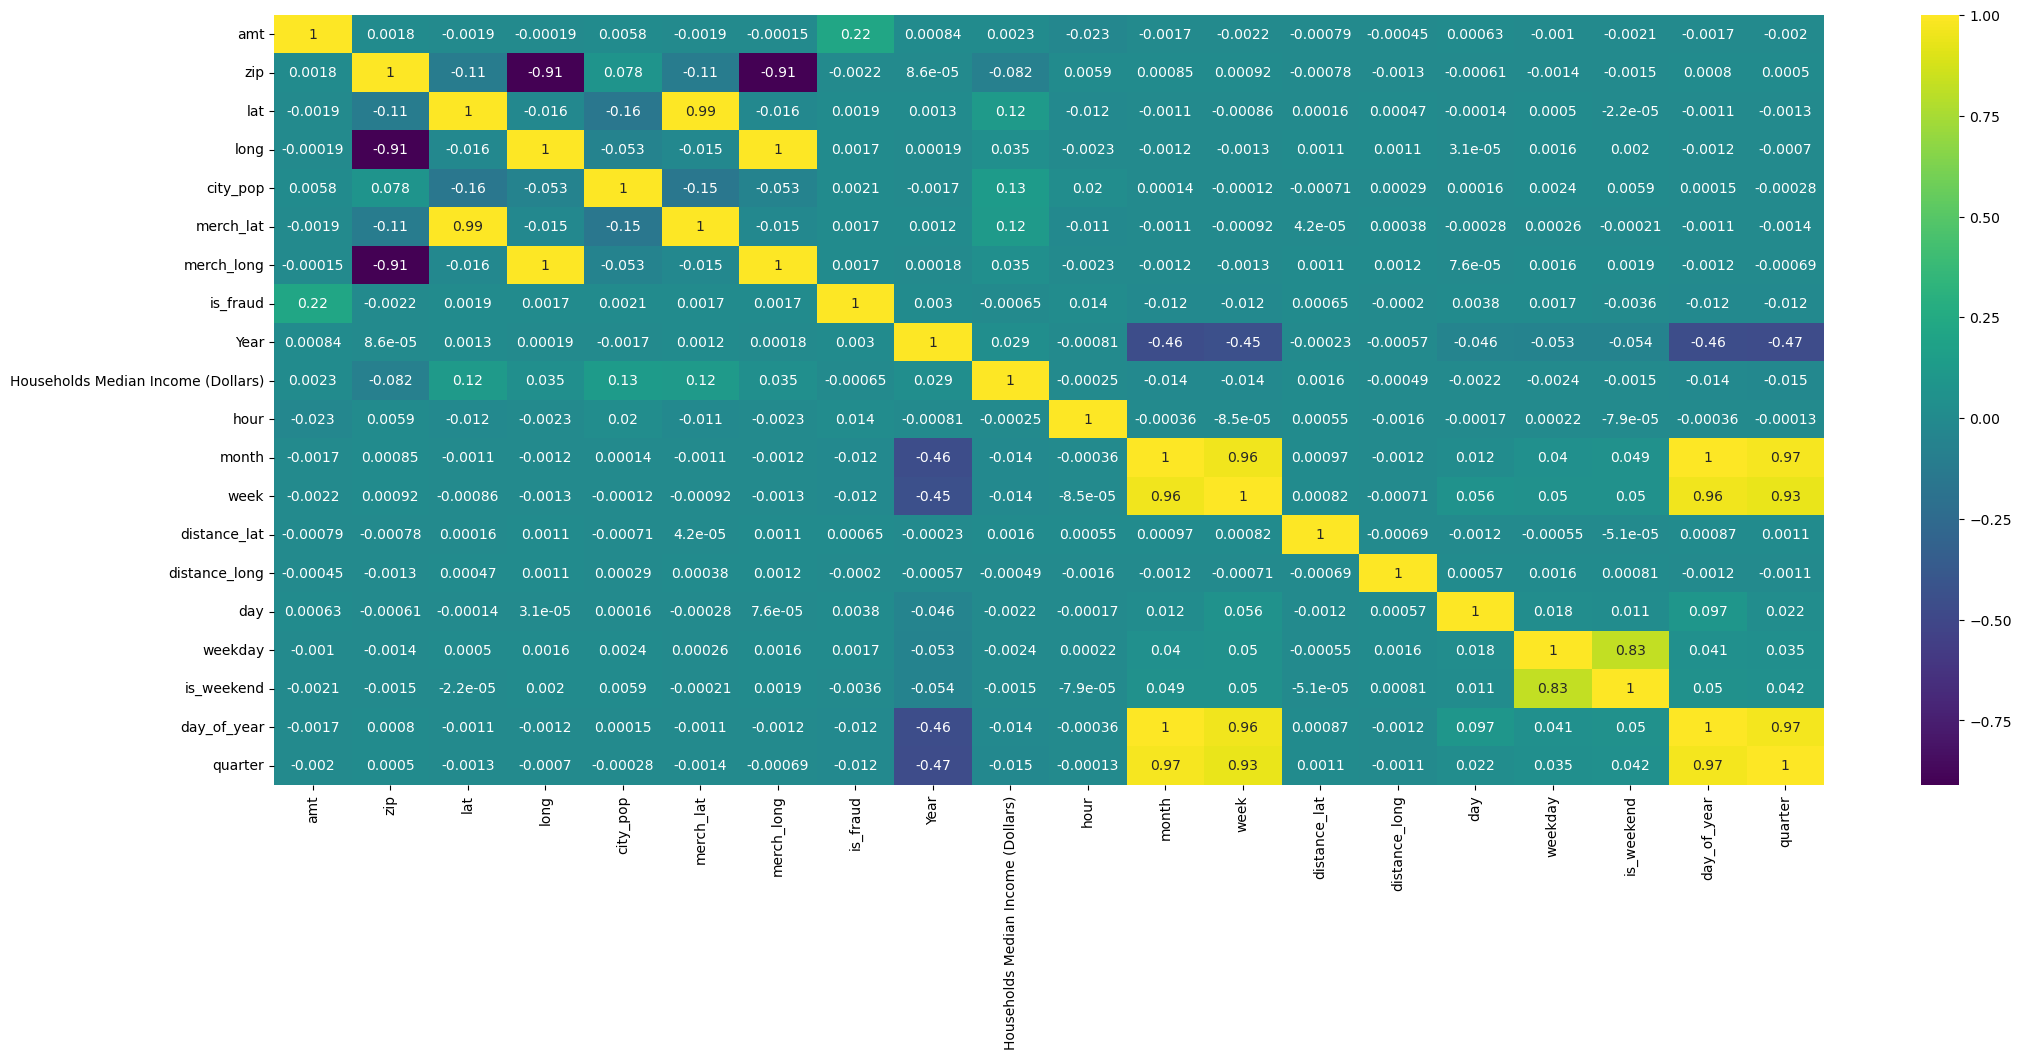

In [137]:
df_dummies_train_data = df_dummies_train.iloc[:,:20].corr()

plt.figure(figsize=(25, 10))

sns.heatmap(df_dummies_train_data, annot=True, cmap="viridis")

plt.show()

- The `month`, `week` have like correlation `more than 0.9`, with `day_of_year`, `quarter` features.
- Dropping the `day_of_year`, `quarter` features for handle correlation and `zip`. 

In [138]:
df_dummies_train = df_dummies_train.drop(['day_of_year', 'quarter','zip','weekday','is_weekend','merch_lat', 'merch_long'],axis=1)
df_dummies_train.columns

Index(['amt', 'lat', 'long', 'city_pop', 'is_fraud', 'Year',
       'Households Median Income (Dollars)', 'hour', 'month', 'week',
       ...
       'state_WV', 'state_WY', 'age_group_<18', 'age_group_18-35',
       'age_group_35-60', 'age_group_60+', 'Median_Income_group_<10k',
       'Median_Income_group_10k-50k', 'Median_Income_group_50k-100k',
       'Median_Income_group_100k+'],
      dtype='object', length=982)

In [139]:
df_dummies_train.iloc[:,:15].columns

Index(['amt', 'lat', 'long', 'city_pop', 'is_fraud', 'Year',
       'Households Median Income (Dollars)', 'hour', 'month', 'week',
       'distance_lat', 'distance_long', 'day', 'category_entertainment',
       'category_food_dining'],
      dtype='object')

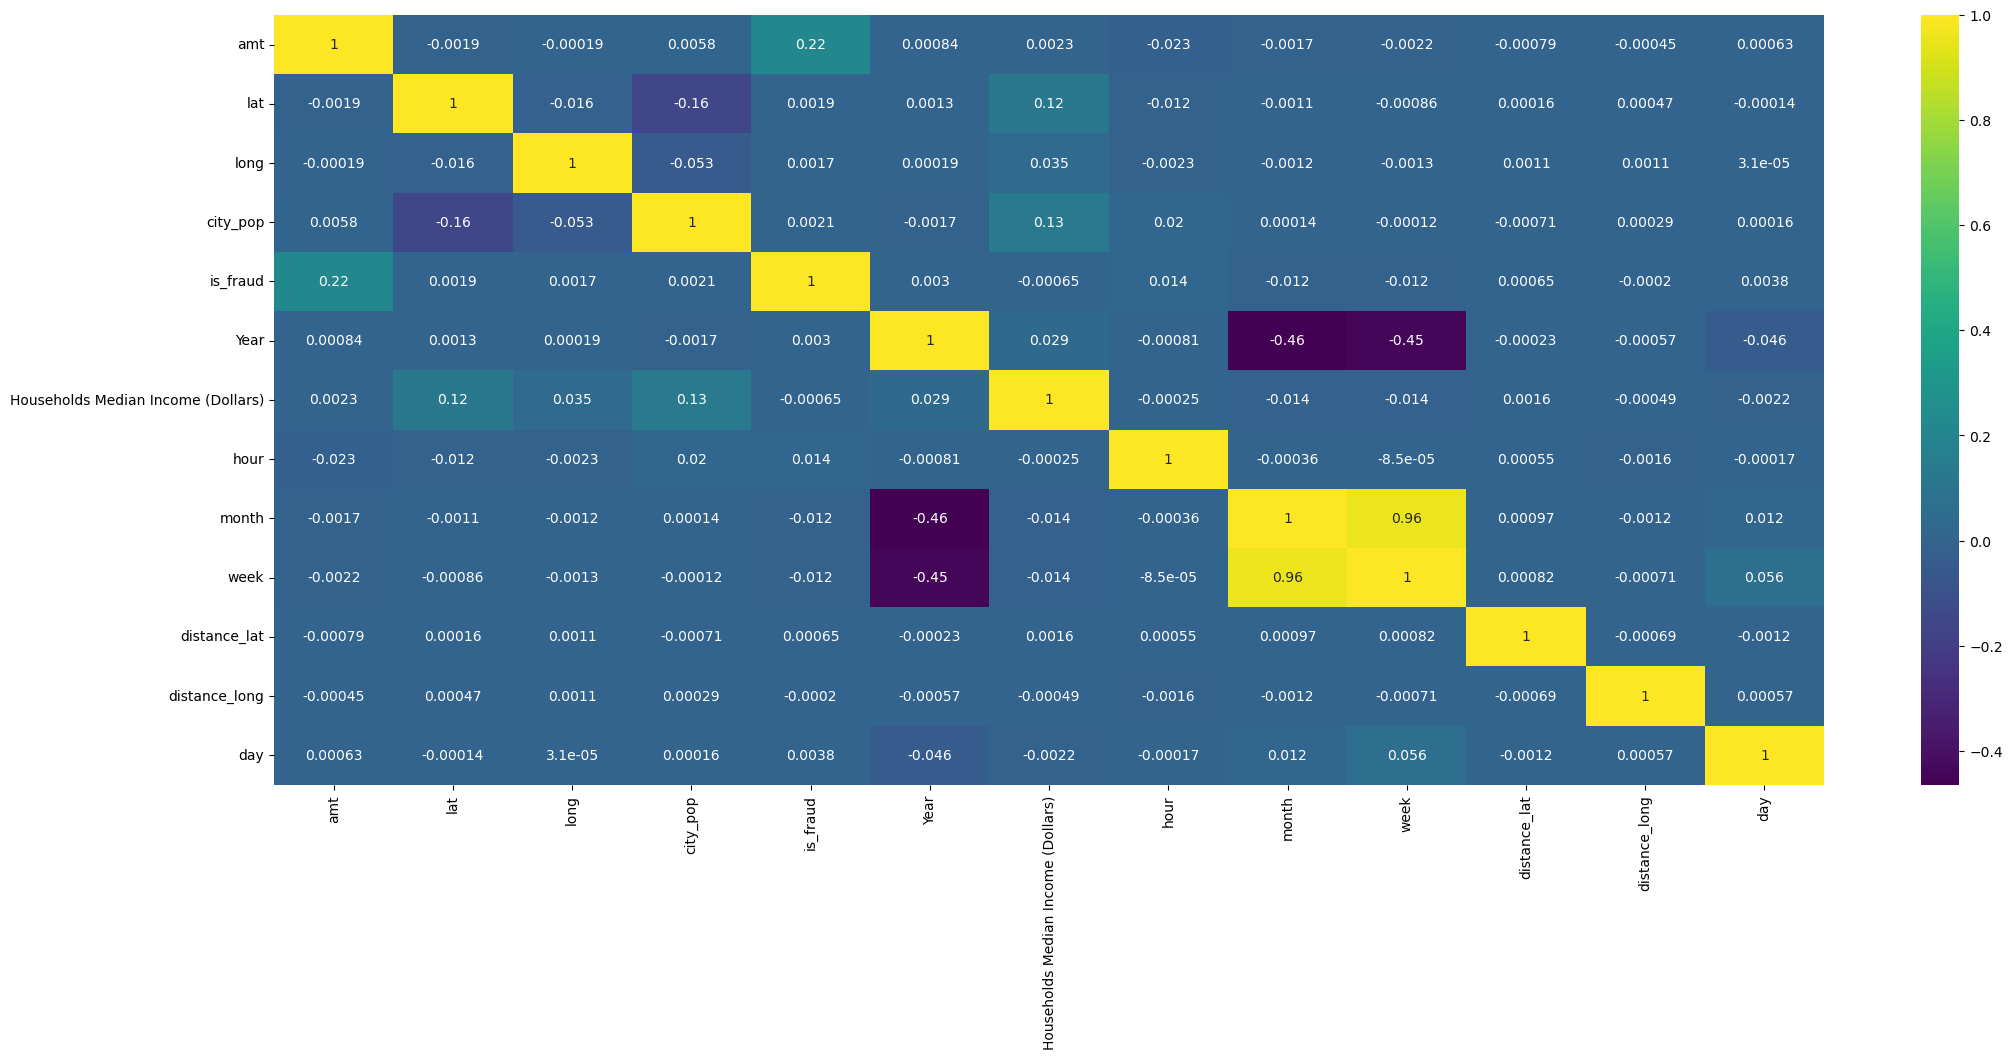

In [140]:

df_dummies_train_data = df_dummies_train.iloc[:,:13].corr()

plt.figure(figsize=(25, 10))

sns.heatmap(df_dummies_train_data, annot=True, cmap="viridis")

plt.show()

- Dropping `'day_of_year', 'quarter','zip','weekday','is_weekend','merch_lat', 'merch_long'` features as they have more than `0.90` as Pearson's Correlation coefficient.
- This `df_dummies_train` will further be used for the classification.

### Correlation between fraud and Numerical features - test data

In [141]:
df_dummies_test = df_dummies_test.drop(['day_of_year', 'quarter','zip','weekday','is_weekend','merch_lat', 'merch_long'],axis=1)

In [142]:
df_dummies_test.iloc[:,:15].columns

Index(['amt', 'lat', 'long', 'city_pop', 'is_fraud', 'Year',
       'Households Median Income (Dollars)', 'hour', 'month', 'week',
       'distance_lat', 'distance_long', 'day', 'category_entertainment',
       'category_food_dining'],
      dtype='object')

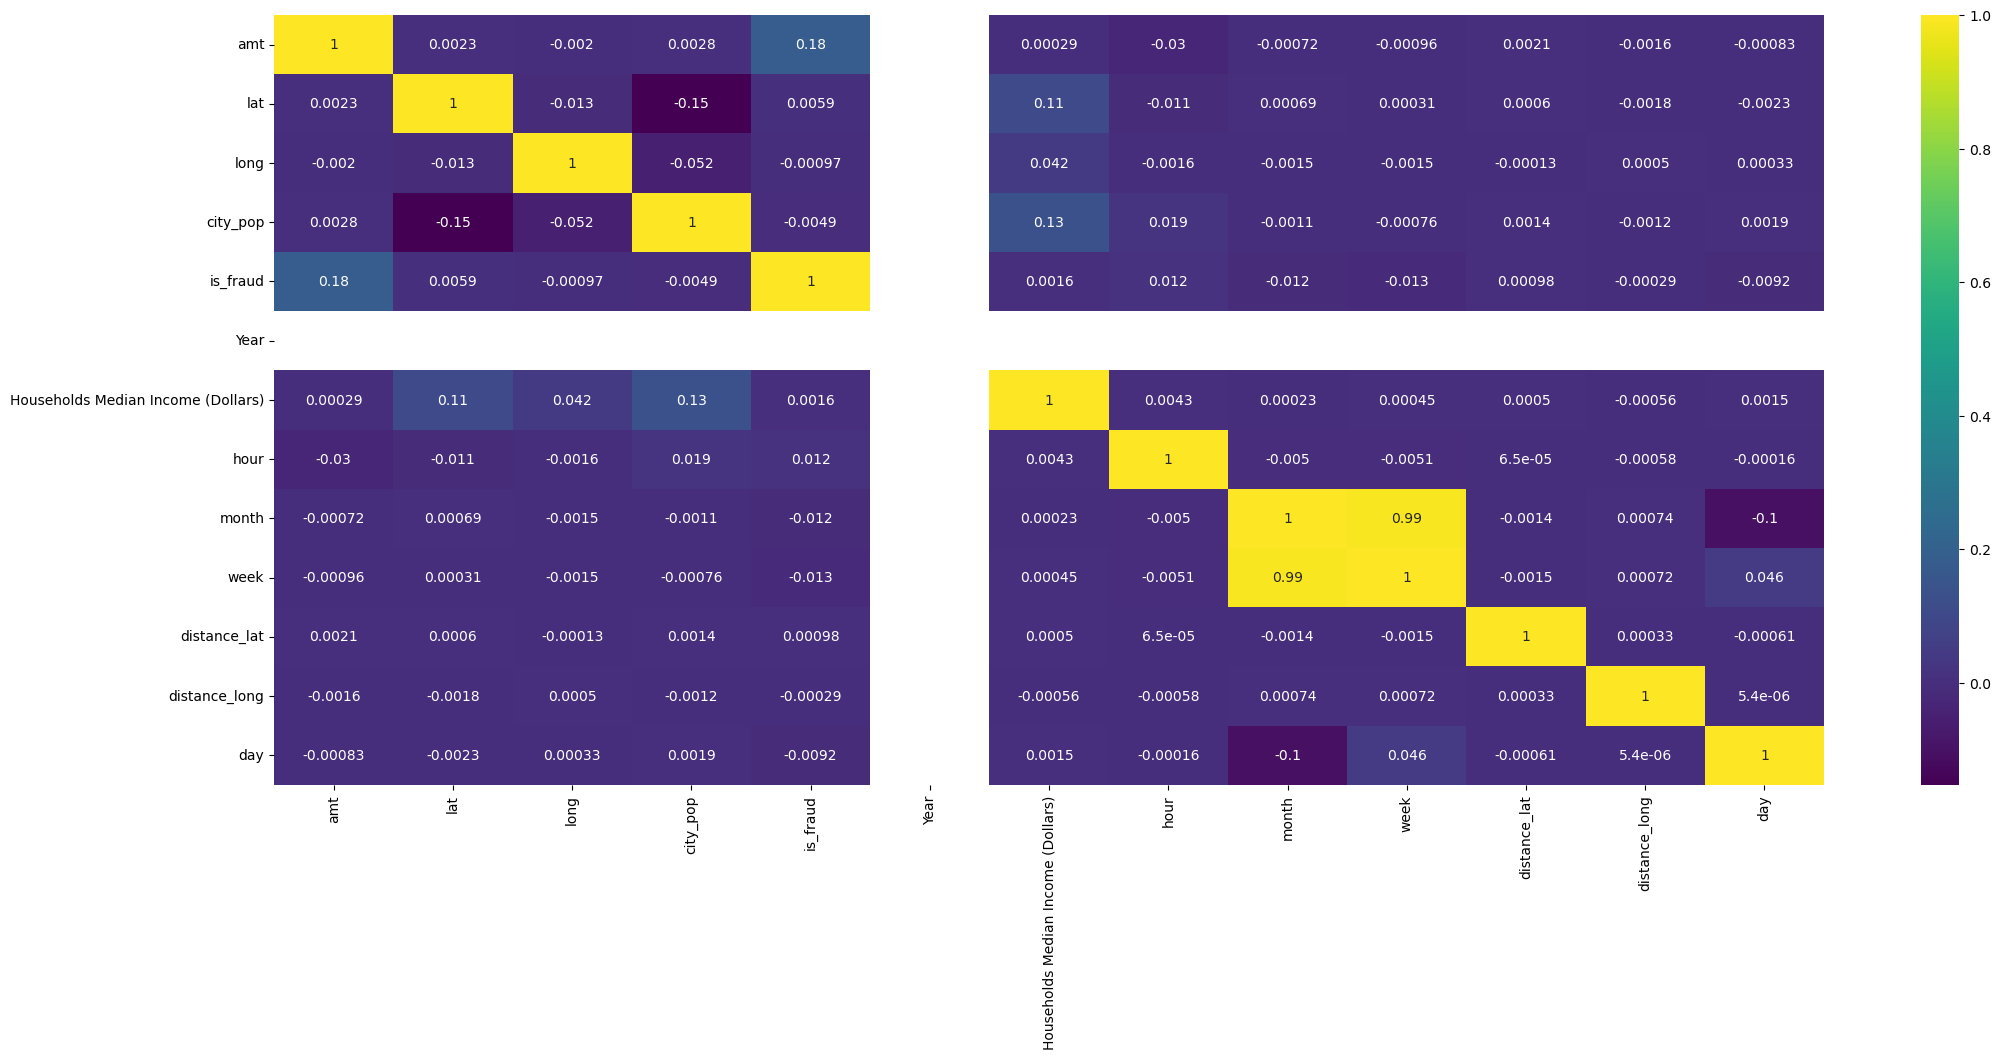

In [143]:
df_dummies_test_data = df_dummies_test.iloc[:,:13].corr()

plt.figure(figsize=(25, 10))

sns.heatmap(df_dummies_test_data, annot=True, cmap="viridis")

plt.show()

- Similar to training data, Dropping `'day_of_year', 'quarter','zip','weekday','is_weekend','merch_lat', 'merch_long'` features as they have more than `0.90` as Pearson's Correlation coefficient.
- This `df_dummies_test` will further be used for the classification.

## Performing the baseline model - LightGBM and RF

- OverSampling, Data Splitting , FEATURE SELECTION AND STANDARDIZATION are all applied only on the training data.

### LightGBM

- Light Gradient Boosting machine is based on decision trees, wherein a series of decision trees split into branches based on features and predict outcome.

In [144]:
%%time 

X = df_dummies_train.drop('is_fraud', axis=1)
y = df_dummies_train['is_fraud'] 

train_data = lgb.Dataset(X, label=y)

params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

num_round = 100
bst = lgb.train(params, train_data, num_round)

y_pred_lightgbm = bst.predict(X)
y_pred_class_lightgbm = (y_pred_lightgbm > 0.5).astype(int)

accuracy_lightgbm = accuracy_score(y, y_pred_class_lightgbm)
print(f'Accuracy: {accuracy_lightgbm:.4f}')

# CPU times: user 37.5 s, sys: 17 s, total: 54.5 s
# Wall time: 36.9 s

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3741
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 932
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146050
[LightGBM] [Info] Start training from score -5.146050
Accuracy: 0.9984
CPU times: user 43.8 s, sys: 20.5 s, total: 1min 4s
Wall time: 33.2 s


In [145]:
X_test = df_dummies_test.drop('is_fraud', axis=1)

missing_columns = set(X.columns) - set(X_test.columns)

for col in missing_columns:
    X_test[col] = 0 

X_test = X_test[X.columns]
y_pred_lightgbm_test = bst.predict(X_test)

y_pred_class_lightgbm_test = (y_pred_lightgbm_test > 0.5).astype(int)
df_dummies_test['predicted_is_fraud'] = y_pred_class_lightgbm_test

y_true_test = df_dummies_test['is_fraud']
accuracy_lightgbm_test = accuracy_score(y_true_test, y_pred_class_lightgbm_test)
print(f'Accuracy on test data: {accuracy_lightgbm_test:.4f}')

Accuracy on test data: 0.9985


In [146]:
print(classification_report(y_true_test, y_pred_class_lightgbm_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.84      0.74      0.79      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.87      0.89    555719
weighted avg       1.00      1.00      1.00    555719



#### Considerations when applying LightGBM on train and test data

 - Here `"unix_time","ZIP","age", "trans_year","Region","job","trans_date_trans_time", "dob", "trans_date"` columns were removed.
 - However, to compensate for dropping `trans_date`, the columns `'day','weekday','is_weekend','day_of_year','quarter'` were added
 - The feature selection and one hot encoding for the object/categorical variables were performed on training and test data .
 - One hot encoding /creating dummies with data introduced columns for each category.
 - There were mismatch in number of columns due to some city and state data not present in the initial test data.
 - These columns have been handled using `0` for numerical value and re-ordering columns to match order of training data which is crucial for `LightGBM`.
 - Another consideration is the imputing of teh salary field using MICE with using year and zip column which is a limitation as there were missing median income data in some ZIP codes.

### Random Forest classification

In [147]:
%%time 

X_train = df_dummies_train.drop('is_fraud', axis=1)
y_train = df_dummies_train['is_fraud'] 

X_test = df_dummies_test.drop('is_fraud', axis=1)
y_test = df_dummies_test['is_fraud']

missing_columns = set(X.columns) - set(X_test.columns)

for col in missing_columns:
    X_test[col] = 0 

X_test = X_test[X.columns]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf_test = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf_test:.2f}')
print(classification_report(y_test, y_pred_rf))

# CPU times: user 15min 37s, sys: 12min 5s, total: 27min 43s
# Wall time: 34min 8s

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.97      0.54      0.69      2145

    accuracy                           1.00    555719
   macro avg       0.99      0.77      0.85    555719
weighted avg       1.00      1.00      1.00    555719

CPU times: user 15min 29s, sys: 49.5 s, total: 16min 18s
Wall time: 16min 47s


In [148]:
importances = rf_model.feature_importances_
feature_names = X_train.columns  

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

top_5_most_important = importance_df_sorted.head(20)
top_5_least_important = importance_df_sorted.tail(5)

print("Top 20 Most Important Features:")
print(top_5_most_important)

print("\nTop 5 Least Important Features:")
print(top_5_least_important)


Top 20 Most Important Features:
                                Feature  Importance
0                                   amt    0.347813
6                                  hour    0.077903
16                 category_grocery_pos    0.040196
10                        distance_long    0.039972
9                          distance_lat    0.039293
11                                  day    0.039165
8                                  week    0.038378
7                                 month    0.027285
5    Households Median Income (Dollars)    0.020927
3                              city_pop    0.019472
976                       age_group_60+    0.016172
2                                  long    0.015589
1                                   lat    0.015448
14               category_gas_transport    0.010879
23                category_shopping_net    0.010795
20                    category_misc_net    0.010732
4                                  Year    0.007794
974                     age_grou

- As per the feature importance of `Random Forest`, Amt has the `highest impact on the fraud`.
- The `Household Income` which is used as a basis to check if locality is `posh` or not has teh 9th importance based on impact on target variable(fraud/not not fraud)
- The `hour` when the transaction occurs also has a significant impact to determien if teh transaction is `fraud  or not`.
- To further determine the `positive and negative correlation with the target `variable, `SHAP` explanation technique implemented at the end for the `2 best model` will provide more insight on the influence of the variable on the target

### XGBoost

In [149]:
# !pip install xgboost

In [150]:
%%time 

X_train.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X_train.columns]
X_test.columns = [str(col).replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X_test.columns]

missing_columns = set(X_train.columns) - set(X_test.columns)
for col in missing_columns:
    X_test[col] = 0
    
X_test = X_test[X_train.columns]

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy for test: {accuracy_xgb:.4f}")

class_report_xgb = classification_report(y_test, y_pred_xgb)
print(f"Classification report for test\n: {class_report_xgb}")


Accuracy for test: 0.9985
Classification report for test
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.91      0.68      0.78      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.84      0.89    555719
weighted avg       1.00      1.00      1.00    555719

CPU times: user 4min 35s, sys: 18 s, total: 4min 53s
Wall time: 35.7 s


### CB-LightGBM 
- Class Balancing LightGBM

#### Class Balanching
- As part of imbalancing problem, we assign higher weights to minority class samples and lower weights to majority class samples.
- This process makes model add more cost or importance to the minority class.

In [151]:

X_train = df_dummies_train.drop('is_fraud', axis=1)
y_train = df_dummies_train['is_fraud'] 

X_test = df_dummies_test.drop('is_fraud', axis=1)
y_test = df_dummies_test['is_fraud']

missing_columns = set(X.columns) - set(X_test.columns)

for col in missing_columns:
    X_test[col] = 0 

X_test = X_test[X.columns]

class_weights = y_train.value_counts(normalize=True).to_dict()
max_class = max(class_weights.values())


In [152]:
class_weights, max_class

({0: 0.9942113482561166, 1: 0.005788651743883394}, 0.9942113482561166)

In [153]:
weights = {cls: max_class / weight for cls, weight in class_weights.items()}

sample_weights = y_train.map(weights)

In [154]:
%%time

X_train = df_dummies_train.drop('is_fraud', axis=1)
y_train = df_dummies_train['is_fraud'] 

X_test = df_dummies_test.drop('is_fraud', axis=1)
y_test = df_dummies_test['is_fraud']

missing_columns = set(X.columns) - set(X_test.columns)

for col in missing_columns:
    X_test[col] = 0 

X_test = X_test[X.columns]

class_weights = y_train.value_counts(normalize=True).to_dict()
max_class = max(class_weights.values())

weights = {cls: max_class / weight for cls, weight in class_weights.items()}

sample_weights = y_train.map(weights)

train_data_cb = lgb.Dataset(X_train, label=y_train, weight=sample_weights)
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalanced': True,
    'scale_pos_weight': 1.0,
    'num_threads': 4,
    'boosting_type': 'gbdt',
}


model_lgb_cb = lgb.train(params, train_data_cb, num_boost_round=100)

y_pred_lgb_cb = model_lgb_cb.predict(X_test)
y_pred_bin_cb = (y_pred_lgb_cb >= 0.5).astype(int)

accuracy_lgb_cb = accuracy_score(y_test, y_pred_bin_cb)
print(f'Accuracy: {accuracy_lgb_cb:.4f}')

class_report_lgb_cb = classification_report(y_test, y_pred_bin_cb)
print(f"Classification report for test\n: {class_report_lgb_cb}")

# CPU times: user 34.9 s, sys: 12.6 s, total: 47.5 s
# Wall time: 31.6 s

[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3741
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 932
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy: 0.9838
Classification report for test
:               precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.19      0.95      0.31      2145

    accuracy                          

### CB-CHL-LightGBM 
- Class Balancing Cost Harmonization Loss LightGBM

#### Class Balanching
- As part of imbalancing problem, we assign higher weights to minority class samples and lower weights to majority class samples.
- This process makes model add more cost or importance to the minority class.

#### Class Harmonization Loss
- modifying the loss function of Light GBM to reduce the class imabalcne by providing balanced importance to fraud and non fraud samples.
- `scale_pos_weight` parameter of the LightGBM can be used to adjust this.
- Here when `'scale_pos_weight': 1.0` is used, it is a default method.
- Weights are inversely proportional to the occurences of the class
- However `'scale_pos_weight': 4.0` provides `4 times` more importance on minority class i.e.,`fraud`.

In [155]:
%%time

X_train = df_dummies_train.drop('is_fraud', axis=1)
y_train = df_dummies_train['is_fraud'] 

X_test = df_dummies_test.drop('is_fraud', axis=1)
y_test = df_dummies_test['is_fraud']

missing_columns = set(X.columns) - set(X_test.columns)

for col in missing_columns:
    X_test[col] = 0 

X_test = X_test[X.columns]

class_weights = y_train.value_counts(normalize=True).to_dict()
max_class = max(class_weights.values())

weights = {cls: max_class / weight for cls, weight in class_weights.items()}

sample_weights = y_train.map(weights)

train_data_cb_chl = lgb.Dataset(X_train, label=y_train, weight=sample_weights)
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalanced': True,
    'scale_pos_weight': 4.0,
    'num_threads': 4,
    'boosting_type': 'gbdt',
}


model_lgb_cb_chl = lgb.train(params, train_data_cb_chl, num_boost_round=100)

y_pred_lgb_cb_chl = model_lgb_cb_chl.predict(X_test)
y_pred_binary = (y_pred_lgb_cb_chl >= 0.5).astype(int)

accuracy_lgb_cb_chl = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy_lgb_cb_chl:.4f}')

class_report_lgb_cb_chl = classification_report(y_test, y_pred_binary)
print(f"Classification report for test\n: {class_report_lgb_cb_chl}")

# CPU times: user 36 s, sys: 12.8 s, total: 48.8 s
# Wall time: 29.5 s

[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3741
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 932
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy: 0.9726
Classification report for test
:               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.12      0.97      0.21      2145

    accuracy                          

### SMOTE-CHL-LightGBM

#### SMOTE (Synthetic Minority Over-sampling Technique)
- SMOTE is an advanced over-sampling technique used to address class imbalance in datasets, particularly in classification tasks.
- In fraud detection, frauds make up a very small percentage of the data, leading the model learning to predict the majority class very well but struggling to detect the minority class.
- This method creates synthetic examples for the minority class to balance the dataset.

In [156]:
%%time

X_train = df_dummies_train.drop('is_fraud', axis=1)
y_train = df_dummies_train['is_fraud'] 

X_test = df_dummies_test.drop('is_fraud', axis=1)
y_test = df_dummies_test['is_fraud']

missing_columns = set(X.columns) - set(X_test.columns)

for col in missing_columns:
    X_test[col] = 0 

X_test = X_test[X.columns]

X_train = X_train.astype('float32')
y_train = y_train.astype('int')

X_test = X_test.astype('float32')
y_test = y_test.astype('int')

assert X_train.isnull().sum().sum() == 0, "Missing values in X_train"
assert X_test.isnull().sum().sum() == 0, "Missing values in X_test"
assert y_train.isnull().sum() == 0, "Missing values in y_train"
assert y_test.isnull().sum() == 0, "Missing values in y_test"


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# CPU times: user 3min 27s, sys: 35min 49s, total: 39min 16s
# Wall time: 59min 55s

CPU times: user 3min 27s, sys: 35min 49s, total: 39min 16s
Wall time: 59min 55s


In [182]:
%%time

X_train_res = X_train_res.astype('float32')
y_train_res = y_train_res.astype('int')

class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1] if class_counts[1] != 0 else 1

train_data = lgb.Dataset(X_train_res, label=y_train_res)
val_data = lgb.Dataset(X_test, label=y_test) 

params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'scale_pos_weight': scale_pos_weight,  # Apply cost harmonization via scale_pos_weight
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1
}

# Define the early stopping callback
early_stopping = lgb.callback.early_stopping(stopping_rounds=50, verbose=True)

# Train the model with early stopping via the callback
model_lgb_smote_chl = lgb.train(
    params, 
    train_data, 
    valid_sets=[val_data], 
    num_boost_round=1000, 
    callbacks=[early_stopping]
)

y_pred = model_lgb_smote_chl.predict(X_test)
y_pred_bin_smote_chl = (y_pred > 0.5).astype(int)

accuracy_lgb_smote_chl = accuracy_score(y_test, y_pred_bin_smote_chl)
print(f'Accuracy: {accuracy_lgb_cb_chl:.4f}')

class_report_lgb_smote_chl = classification_report(y_test, y_pred_bin_smote_chl)
print(f"Classification report for test\n: {class_report_lgb_cb_chl}")

# CPU times: user 3min, sys: 38.7 s, total: 3min 38s
# Wall time: 53.3 s

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[232]	valid_0's binary_error: 0.0198824
Accuracy: 0.9726
Classification report for test
:               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.12      0.97      0.21      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.97      0.60    555719
weighted avg       1.00      0.97      0.98    555719

CPU times: user 2min 30s, sys: 33 s, total: 3min 3s
Wall time: 1min 4s


### Logistic Classification

In [158]:
X_train = df_dummies_train.drop('is_fraud', axis=1)
y_train = df_dummies_train['is_fraud'] 

X_test = df_dummies_test.drop('is_fraud', axis=1)
y_test = df_dummies_test['is_fraud']

missing_columns = set(X_train.columns) - set(X_test.columns)
for col in missing_columns:
    X_test[col] = 0 
X_test = X_test[X_train.columns]

class_weights = {0: 1, 1: 4}

logreg = LogisticRegression(solver='liblinear', class_weight=class_weights, max_iter=10000, C=0.1)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy_logreg:.4f}')

class_report_logreg = classification_report(y_test, y_pred_logreg)
print(f"Classification report for test:\n{class_report_logreg}")


Accuracy: 0.9943
Classification report for test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.24      0.22      0.23      2145

    accuracy                           0.99    555719
   macro avg       0.62      0.61      0.61    555719
weighted avg       0.99      0.99      0.99    555719



### Confusion Matrix

In [159]:

def confusion_matrix_plot(y_test, y_hat_test, title):
    
    confus_matrix = confusion_matrix(y_test, y_hat_test)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        confus_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Not Fraud", "Fraud"],
        yticklabels=["Not Fraud", "Fraud"],
    )
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix: {title}")
    plt.show()


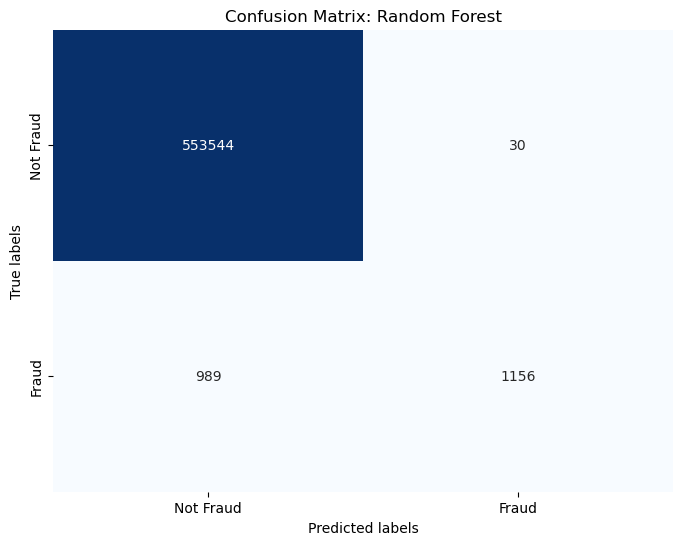

In [160]:
confusion_matrix_plot(y_test, y_pred_rf, "Random Forest")

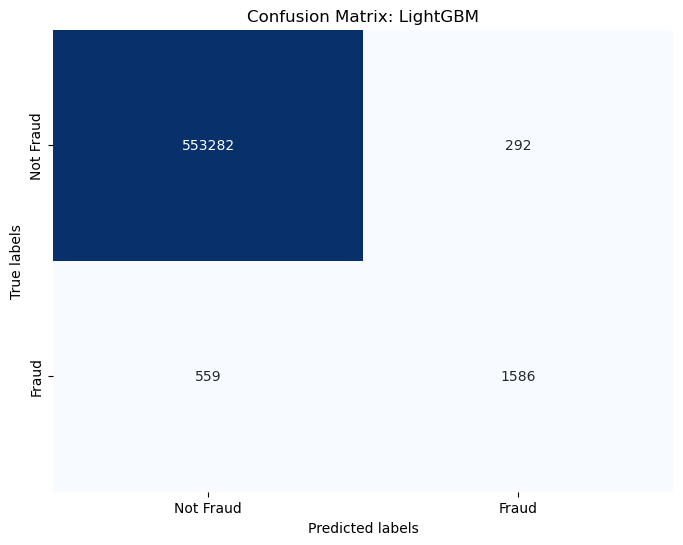

In [161]:
confusion_matrix_plot(y_true_test, y_pred_class_lightgbm_test, "LightGBM")

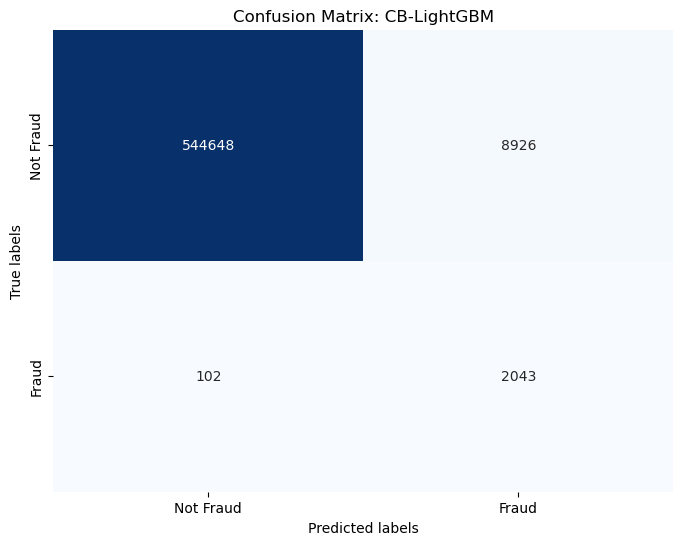

In [162]:
confusion_matrix_plot(y_test, y_pred_bin_cb, "CB-LightGBM")

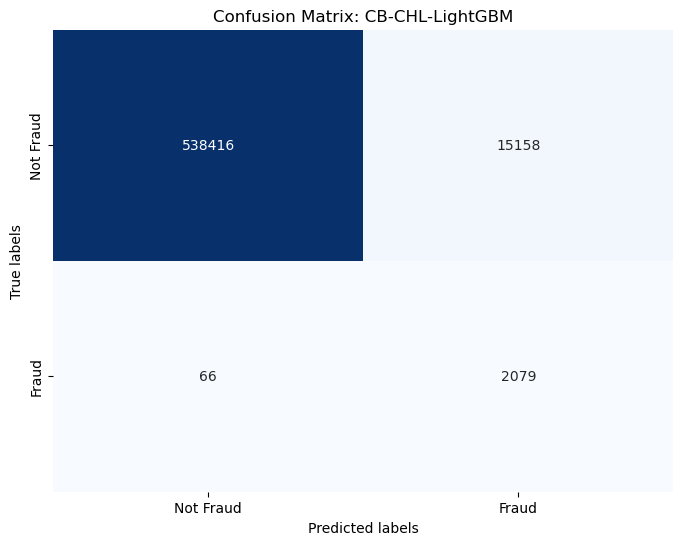

In [163]:
confusion_matrix_plot(y_test, y_pred_binary, "CB-CHL-LightGBM")

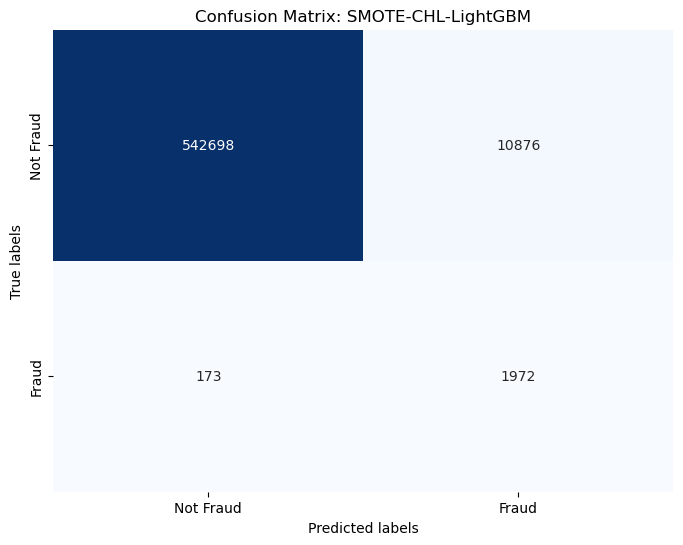

In [164]:
confusion_matrix_plot(y_test, y_pred_bin_smote_chl, "SMOTE-CHL-LightGBM")

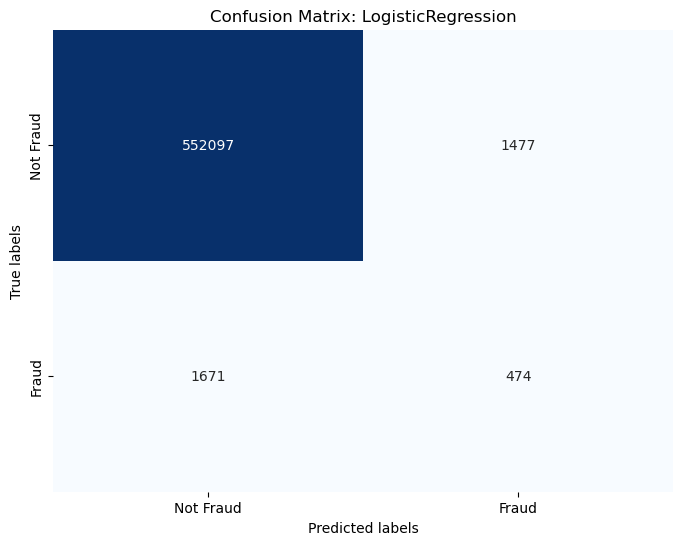

In [165]:
confusion_matrix_plot(y_test, y_pred_logreg, "LogisticRegression")

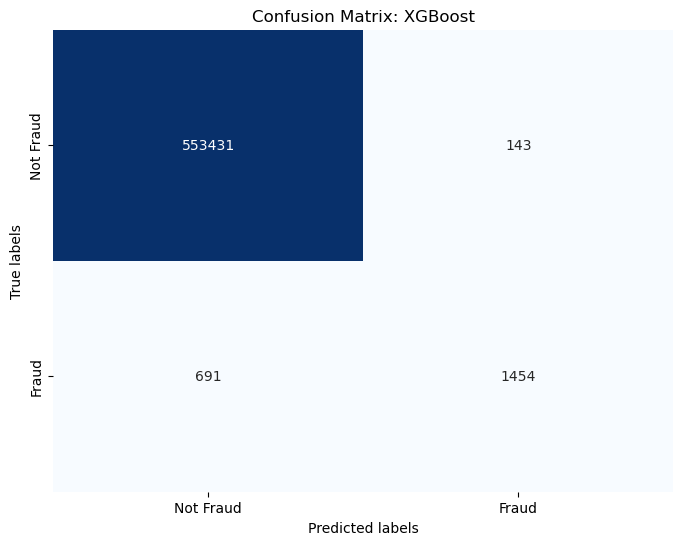

In [166]:
confusion_matrix_plot(y_test, y_pred_xgb, "XGBoost")

## Performance Metrics

In [167]:
def calculate_metrics(y_test, y_pred, cost_positive=1, cost_negative=1):
    """
    Calculate evaluation metrics: AUC, Precision, Recall, F-Measure, MCC, Cost Savings, Cost Loss.

    Parameters:
    - y_test: array-like, true labels
    - y_pred: array-like, predicted labels
    - cost_positive: cost associated with a positive prediction (default=1)
    - cost_negative: cost associated with a negative prediction (default=1)

    Returns:
    - metrics: dict with all the calculated metrics
    """

    metrics = {}

    try:
        auc = roc_auc_score(y_test, y_pred)
    except ValueError:  # In case of constant labels, this may raise an error
        auc = None
    metrics['AUC'] = auc

    precision = precision_score(y_test, y_pred)
    metrics['Precision'] = precision

    recall = recall_score(y_test, y_pred)
    metrics['Recall'] = recall

    f_measure = f1_score(y_test, y_pred)
    metrics['F-Measure'] = f_measure

    mcc = matthews_corrcoef(y_test, y_pred)
    metrics['MCC'] = mcc

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    cost_savings = tp * cost_positive
    cost_loss = (fn * cost_negative) + (fp * cost_positive)

    metrics['CostSavings'] = cost_savings
    metrics['CostLoss'] = cost_loss

    return metrics

In [168]:
metrics_randomForest = calculate_metrics(y_test, y_pred_rf)
print(f"Random Forest :\n{metrics_randomForest}")

Random Forest :
{'AUC': 0.7694367728155442, 'Precision': 0.9747048903878583, 'Recall': 0.5389277389277389, 'F-Measure': 0.6940858601020714, 'MCC': 0.7240729304378697, 'CostSavings': 1156, 'CostLoss': 1019}


In [169]:
metrics_LightGBM= calculate_metrics(y_true_test, y_pred_class_lightgbm_test)
print(f"LightGBM :\n{metrics_LightGBM}")

LightGBM :
{'AUC': 0.8694332289866039, 'Precision': 0.8445154419595314, 'Recall': 0.7393939393939394, 'F-Measure': 0.7884663186676609, 'MCC': 0.7894544852895972, 'CostSavings': 1586, 'CostLoss': 851}


In [170]:
metrics_CB_LightGBM = calculate_metrics(y_test, y_pred_bin_cb)
print(f"CB-LightGBM :\n{metrics_CB_LightGBM}")

CB-LightGBM :
{'AUC': 0.9681616201254045, 'Precision': 0.18625216519281612, 'Recall': 0.9524475524475524, 'F-Measure': 0.31157541558639623, 'MCC': 0.4173929945717359, 'CostSavings': 2043, 'CostLoss': 9028}


In [171]:
metrics_CB_CHL_LightGBM= calculate_metrics(y_test, y_pred_binary)
print(f"CB-CHL-LightGBM :\n{metrics_CB_CHL_LightGBM}")

CB-CHL-LightGBM :
{'AUC': 0.9709243514382485, 'Precision': 0.1206126356094448, 'Recall': 0.9692307692307692, 'F-Measure': 0.21452894438138478, 'MCC': 0.33687299542254334, 'CostSavings': 2079, 'CostLoss': 15224}


In [172]:
metrics_SMOTE_CHL_LightGBM = calculate_metrics(y_test, y_pred_bin_smote_chl)
print(f"SMOTE-CHL-LightGBM :\n{metrics_SMOTE_CHL_LightGBM}")

SMOTE-CHL-LightGBM :
{'AUC': 0.949850221434147, 'Precision': 0.15348692403486924, 'Recall': 0.9193473193473194, 'F-Measure': 0.26305609284332687, 'MCC': 0.3712216864921083, 'CostSavings': 1972, 'CostLoss': 11049}


In [173]:
metrics_LogisticRegression = calculate_metrics(y_test, y_pred_logreg)
print(f"LogisticRegression :\n{metrics_LogisticRegression}")

LogisticRegression :
{'AUC': 0.6091554521702975, 'Precision': 0.24295233213736545, 'Recall': 0.22097902097902097, 'F-Measure': 0.2314453125, 'MCC': 0.22886762154556275, 'CostSavings': 474, 'CostLoss': 3148}


In [174]:
metrics_XGBoost = calculate_metrics(y_test, y_pred_xgb)
print(f"XGBoost :\n{metrics_XGBoost}")

XGBoost :
{'AUC': 0.8387985782373887, 'Precision': 0.9104571070757671, 'Recall': 0.6778554778554778, 'F-Measure': 0.7771245323356494, 'MCC': 0.7849064728540746, 'CostSavings': 1454, 'CostLoss': 834}


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Performance Interpretation

#### AUC (Area Under the Curve):

- Measures how well the model separates the classes (fraud vs. non-fraud). Higher is better.
- **Best AUC: CB-CHL-LightGBM (0.9709) and CB-LightGBM (0.9681)**, showing these models are **excellent at distinguishing between fraud and non-fraud**.

#### Precision:

- **Proportion of predicted fraud cases that are actually fraud**.
- High Precision: Random Forest (0.9747), meaning it minimizes false positives but at the cost of recall.
- Low Precision: CB-CHL-LightGBM (0.1206), despite high recall, indicates many false positives.

#### Recall:

- **Proportion of actual fraud cases that are correctly identified by the model**.
- Best Recall: CB-LightGBM (0.9524) and CB-CHL-LightGBM (0.9692), indicating these models are excellent at identifying fraud cases but may predict many false positives.

#### F-Measure:

- **Harmonic mean of Precision and Recall. Balances these two metrics**.
- Best Balance: XGBoost (0.7771) and LightGBM (0.7884), providing a good trade-off between high precision and high recall.

#### MCC (Matthews Correlation Coefficient):

- **A balanced metric that accounts for true/false positives and negatives. Useful for imbalanced datasets.**
- Best MCC: XGBoost (0.7849) and LightGBM (0.7894), showing strong overall performance.

#### Cost Savings:

- **Positive impact of correctly identifying fraud cases. Models that identify more true positives have higher savings.**
- Best Cost Savings: **CB-CHL-LightGBM (2,079) and CB-LightGBM (2,043).**

#### Cost Loss:

- **Negative impact of false positives and false negatives. Lower is better.**
- Lowest Cost Loss: XGBoost (834) and LightGBM (851), meaning these models balance false predictions better than others.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Model Comparison:

#### **Random Forest**:

- High precision (0.9747) but low recall (0.5389), meaning it is conservative in predicting fraud to minimize false positives.
- **Suitable if false positives are highly costly.**

#### **LightGBM**:

- Strong AUC (0.8694), good balance between precision (0.8445) and recall (0.7394), and low cost loss (851).
- **A reliable model for fraud detection with good balance.**

#### **CB-LightGBM and CB-CHL-LightGBM**:

- Exceptional AUC and recall but suffer from low precision and high cost loss.
- These models prioritize detecting fraud but may result in too many false positives.
- **Use case: When detecting all fraud cases is more important than false positives.**

#### **SMOTE-CHL-LightGBM**:

- Similar to CB models but with slightly worse recall and cost loss.
- **SMOTE is likely over-compensating for the imbalanced data, leading to high false positives.**

#### **Logistic Regression**:

- Worst performance overall (low AUC, Precision, Recall, and F-Measure).
- **Not suitable for this fraud detection task.**

#### **XGBoost**:

- A strong all-around performer with high F-Measure (0.7771), MCC (0.7849), and low cost loss (834).
- **Balances precision and recall effectively and minimizes cost.**

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Recommendations:
- Best for **High Recall (detect all fraud cases)**: `CB-CHL-LightGBM or CB-LightGBM`.
- Best for **Overall Balance (Precision and Recall)**: `XGBoost or LightGBM`.
- Best for **Minimizing False Positives**: `Random Forest or XGBoost`.
> **Avoid: Logistic Regression**, as it performs poorly in all metrics.
- If cost is a major factor, `XGBoost and LightGBM are the most cost-effective choices`.
- If prioritizing `fraud detection (recall)`, we could go with `CB-CHL-LightGBM or CB-LightGBM`, but need to be `prepared to handle false positives`.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### SHAP (SHapley Additive exPlanations) 

- `SHAP` is a powerful tool to interpret machine learning models, especially `tree-based models like LightGBM`.

In [175]:
# !pip install shap

In [176]:
def plot_shap_explanation(model, X_test, feature_names=None):
    """
    Function to provide SHAP explanation and plot for a LightGBM model.
    
    Parameters:
    - model: Trained LightGBM model
    - X_test: Test data for which SHAP values are calculated
    - feature_names: List of feature names (optional)
    
    Returns:
    - SHAP summary plot
    """
    explainer = shap.Explainer(model)
    
    shap_values = explainer(X_test)
    
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    
    plt.show()
    
    return shap_values

#### CB-LightGBM

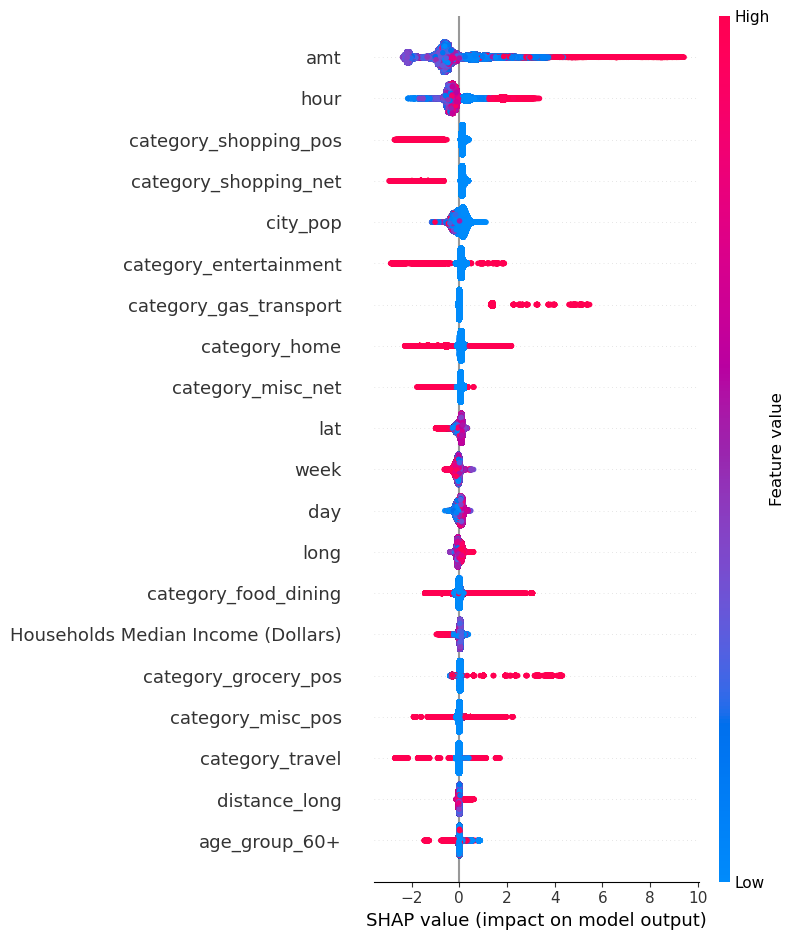

In [177]:
shap_values = plot_shap_explanation(model_lgb_cb, X_test, feature_names=X_test.columns)

#### CB-CHL-LightGBM

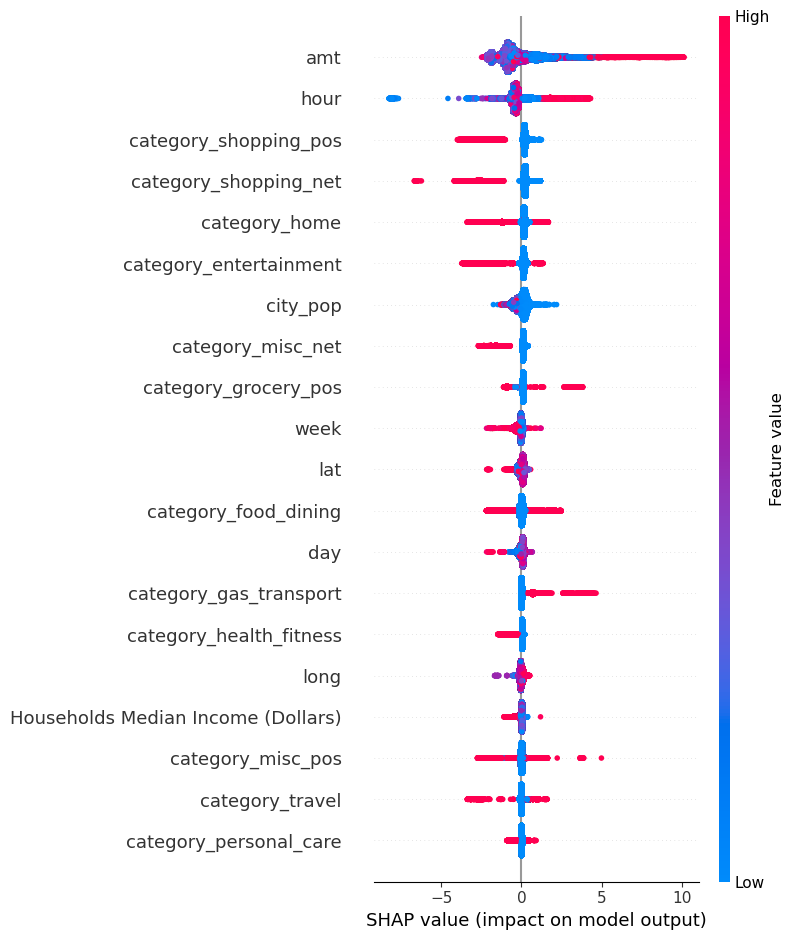

CPU times: user 11min 55s, sys: 23.5 s, total: 12min 19s
Wall time: 5min 57s


In [181]:
%%time
shap_values_cb_chl = plot_shap_explanation(model_lgb_cb_chl, X_test, feature_names=X_test.columns)

In [183]:
def plot_shap_explanation_force_plot(model, X_test, feature_names=None):
    """
    Function to provide SHAP explanation and plot for a tree-based model.
    
    Parameters:
    - model: Trained tree-based model (e.g., LightGBM or CatBoost)
    - X_test: Test data for which SHAP values are calculated
    - feature_names: List of feature names (optional)
    
    Returns:
    - SHAP force plot
    """
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    sample_index = 0
    shap.force_plot(
        explainer.expected_value, 
        shap_values[sample_index, :], 
        X_test.iloc[sample_index, :],
        matplotlib=True,
        feature_names=feature_names
    )
    
    return shap_values


In [ ]:
%%time
shap_values = plot_shap_explanation_force_plot(model_lgb_cb, X_test, feature_names=X_test.columns)

In [ ]:
%%time
shap_values_cb_chl = plot_shap_explanation_force_plot(model_lgb_cb_chl, X_test, feature_names=X_test.columns)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Limitations

- The limitations of the method include the imputation of the `Household median Income` values taken from the Bureau of Labor Statistics.
- Here `MICE Imputation` was used for imputing the data on basis of state , year and the existing income values.
- Other factors like `education, housing value, urban rural economy, Distance to large metro` should be considered to impute values instead of existing ones.

- The paper `"Improved LightGBM for Extremely Imbalanced Data and Application to Credit Card Fraud Detection." IEEE Access 12 (2024): 159316-159335.` was used as a base for this project.
- The paper depicted the usage of `12 different models` with `4 baseline models` to compare the best method for handling the imbalanced classification problem of `Credit Card Fraud Detection`.
- In my implementation , I have considered the baseline methods `Random Forest`, `XGBoost`, `LightGBM`, along with `Logistic Regression`, `CB-LightGBM`, `CB-CHL-LightGBM`, `SMOTE-CHL-LightGBM`.
- I have also incorporated th correlation between the numerical features used in the model input, and dropped columns with `more than 0.90` as correlation coefficient to handle high collinearity.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Findings

- Since the part of the goal is to find the model which best identifies the fraud cases , the models `CB-LightGBM`, `CB-CHL-LightGBM` are considered.
- Using SHAP, we are able to find the distribution of SHAP values for each feature indicating the importance of each feature and how they influence the predictions.
- The main goal is to determine the effect of the `Location ` and `Household Median Income` on the fradulent transactions.

### **CB-LightGBM**

### **CB-CHL-LightGBM**

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion